In [1]:
filePath = '/content/Leads.csv'

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option("display.max_columns",None)

# Importing the dataset

In [4]:
dataset = pd.read_csv(filePath)
dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Inspecting the dataset

In [5]:
dataset.shape

(9240, 37)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
dataset.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
dataset.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
dataset.isnull().sum()*100 /dataset.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

# Data Cleaning

In [10]:
#Drop the Prospect ID & Lead Number
dataset.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [11]:
# List the categorical Columns
cat_col = ['Lead Origin','Lead Source','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Tags','Lead Quality','Lead Profile','City' ,'Last Notable Activity']
cat_col

['Lead Origin',
 'Lead Source',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Last Notable Activity']

In [12]:
# Check the unique values in each catogory
for i in cat_col:
  print(i,':',dataset[i].value_counts())
  print('-------------------------------------------------------------------------')

Lead Origin : Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
-------------------------------------------------------------------------
Lead Source : Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
-------------------------------------------------------------------------
Country : India                   6492
United States  

# Changing the "Select" value to null

In [13]:
sel = ['City','Lead Profile','How did you hear about X Education','Specialization']
dataset[sel] = dataset[sel].replace("Select",np.nan)
dataset.isnull().sum()*100 /dataset.shape[0]

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

# Dropping columns with null value > 40%

In [14]:
cols = dataset.columns
for i in cols:
  if((dataset[i].isnull().sum()*100 /dataset.shape[0])>40):
    dataset.drop(i,axis=1,inplace=True)
dataset.isnull().sum()*100 /dataset.shape[0]

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

# Replacing the Null values

In [15]:
cols = dataset.columns
for i in cols:
  if((dataset[i].isnull().sum()*100 /dataset.shape[0])<15 and dataset[i].dtype == 'object'):
    dataset[i].replace(np.nan,dataset[i].mode,inplace=True)
dataset.isnull().sum()*100 /dataset.shape[0]

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     0.000000
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [16]:
cols = dataset.columns
for i in cols:
  if((dataset[i].isnull().sum()*100 /dataset.shape[0])>15 and dataset[i].dtype == 'object'):
    dataset[i].replace(np.nan,'Others',inplace=True)
dataset.isnull().sum()*100 /dataset.shape[0]

Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [17]:
print(dataset.shape)
print(dataset.info())

(9240, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                  

# Exclude the rows with null values on columns TotalVisits and Page Views Per Visit

In [18]:
dataset = dataset[~pd.isnull(dataset['TotalVisits'])] #remove the data with null value
dataset = dataset[~pd.isnull(dataset['Page Views Per Visit'])] #remove the data with null value
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

# EDA on the dataset

In [19]:
cat_obj = list(dataset.select_dtypes(include ='object'))
cat_obj

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

Lead Origin


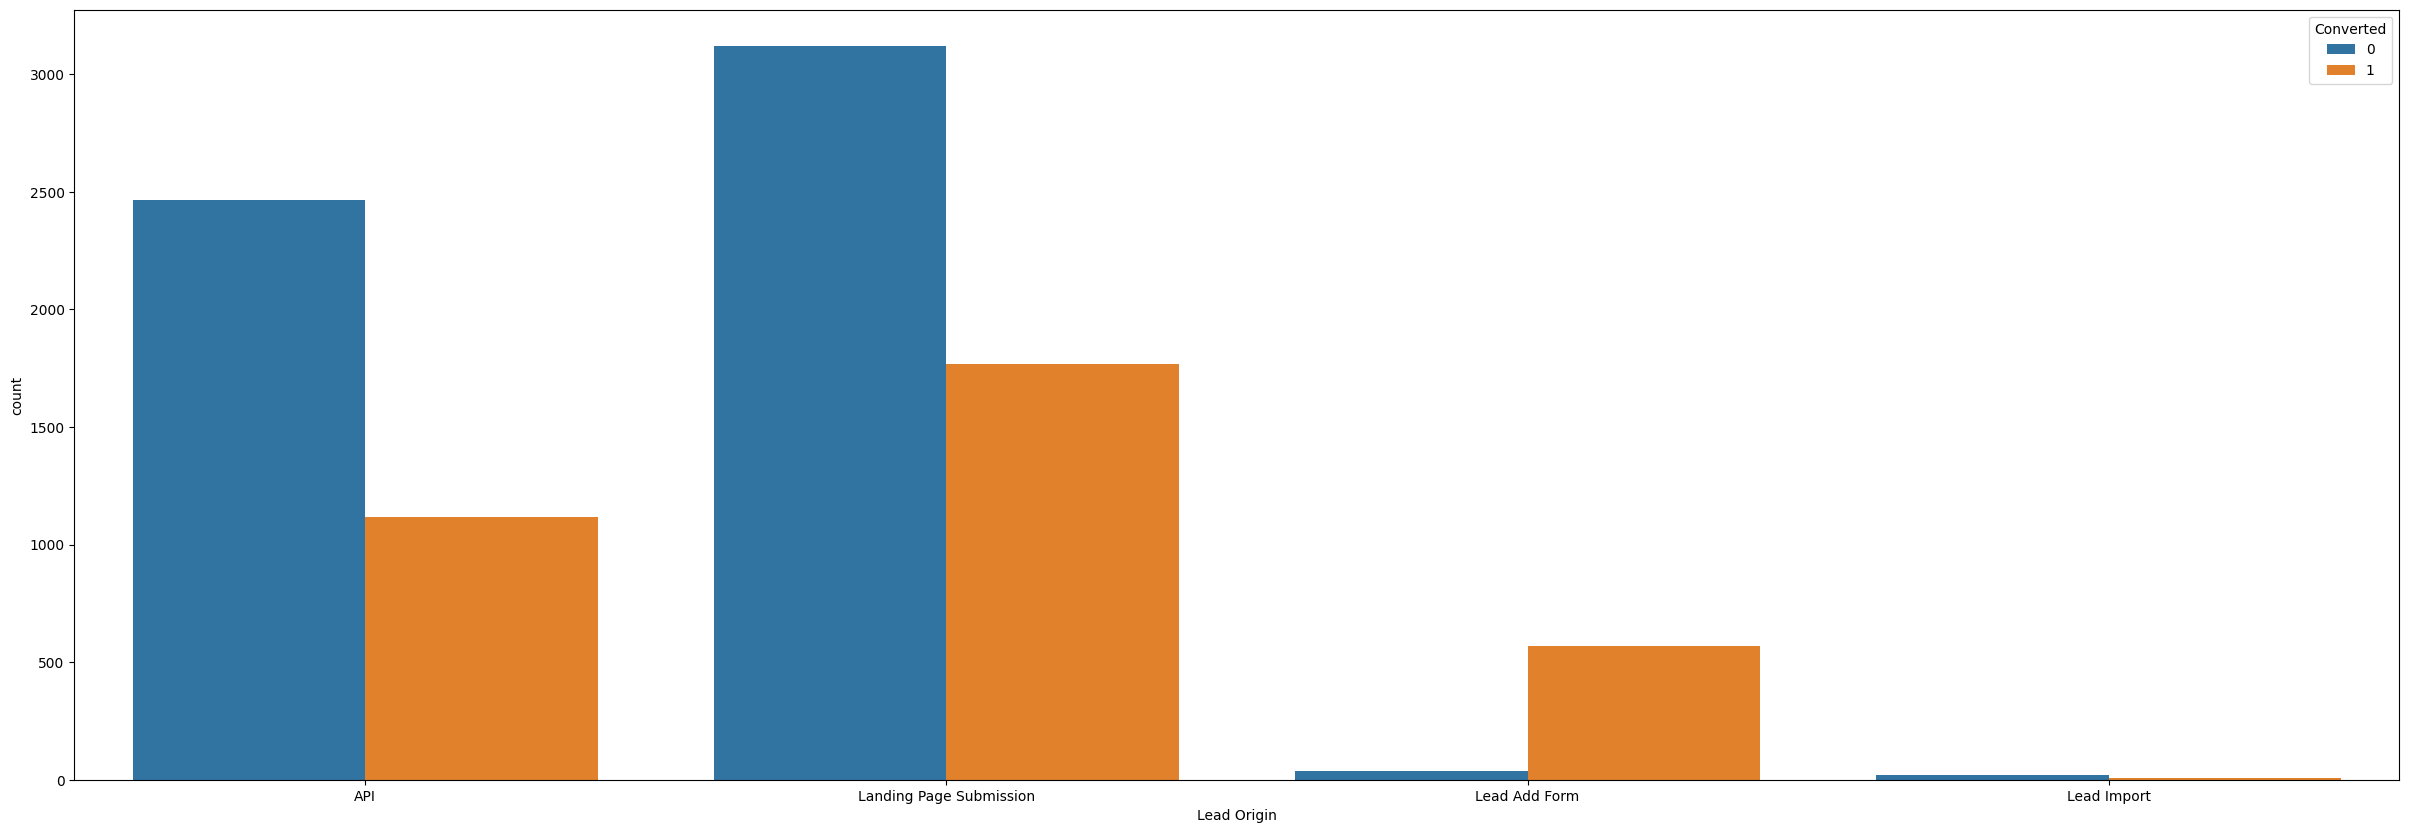

Lead Source


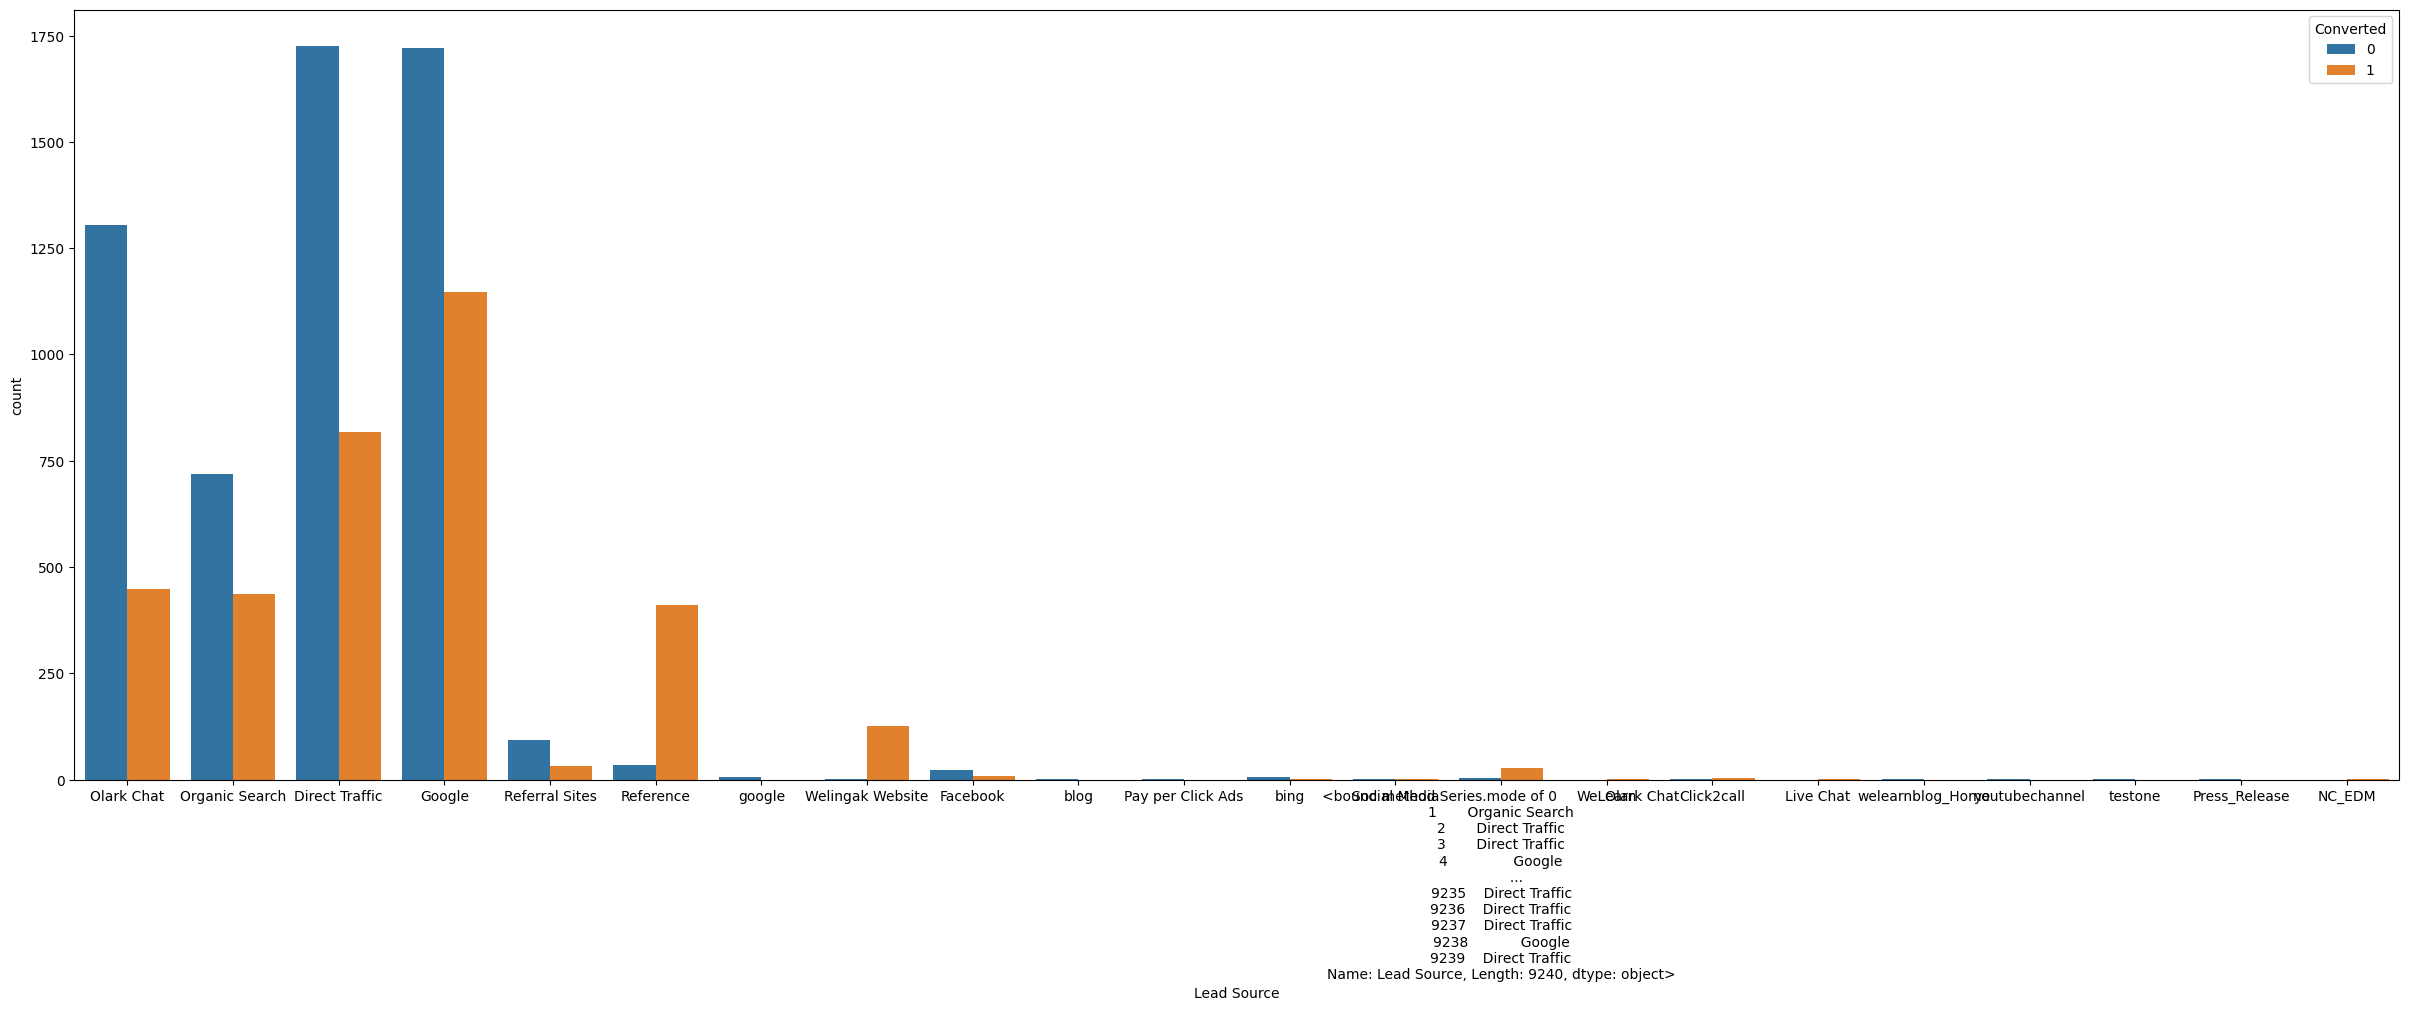

Do Not Email


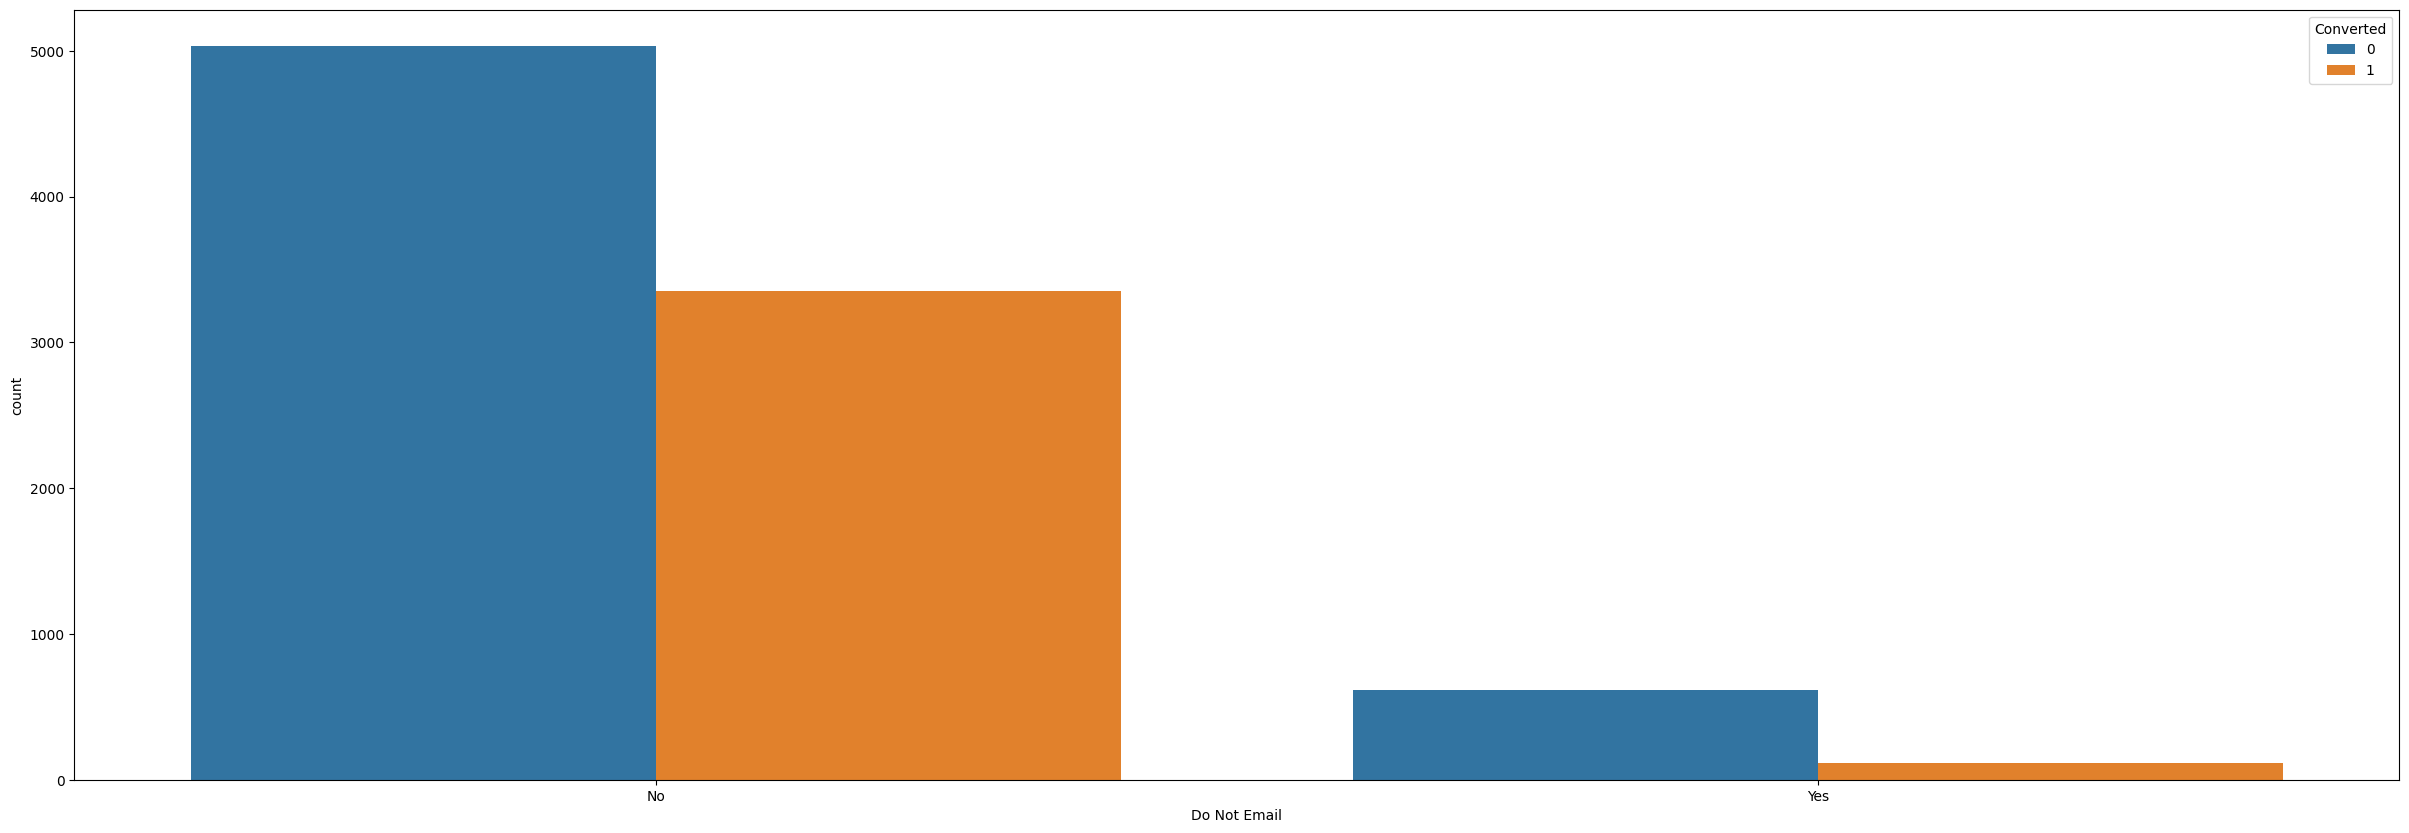

Do Not Call


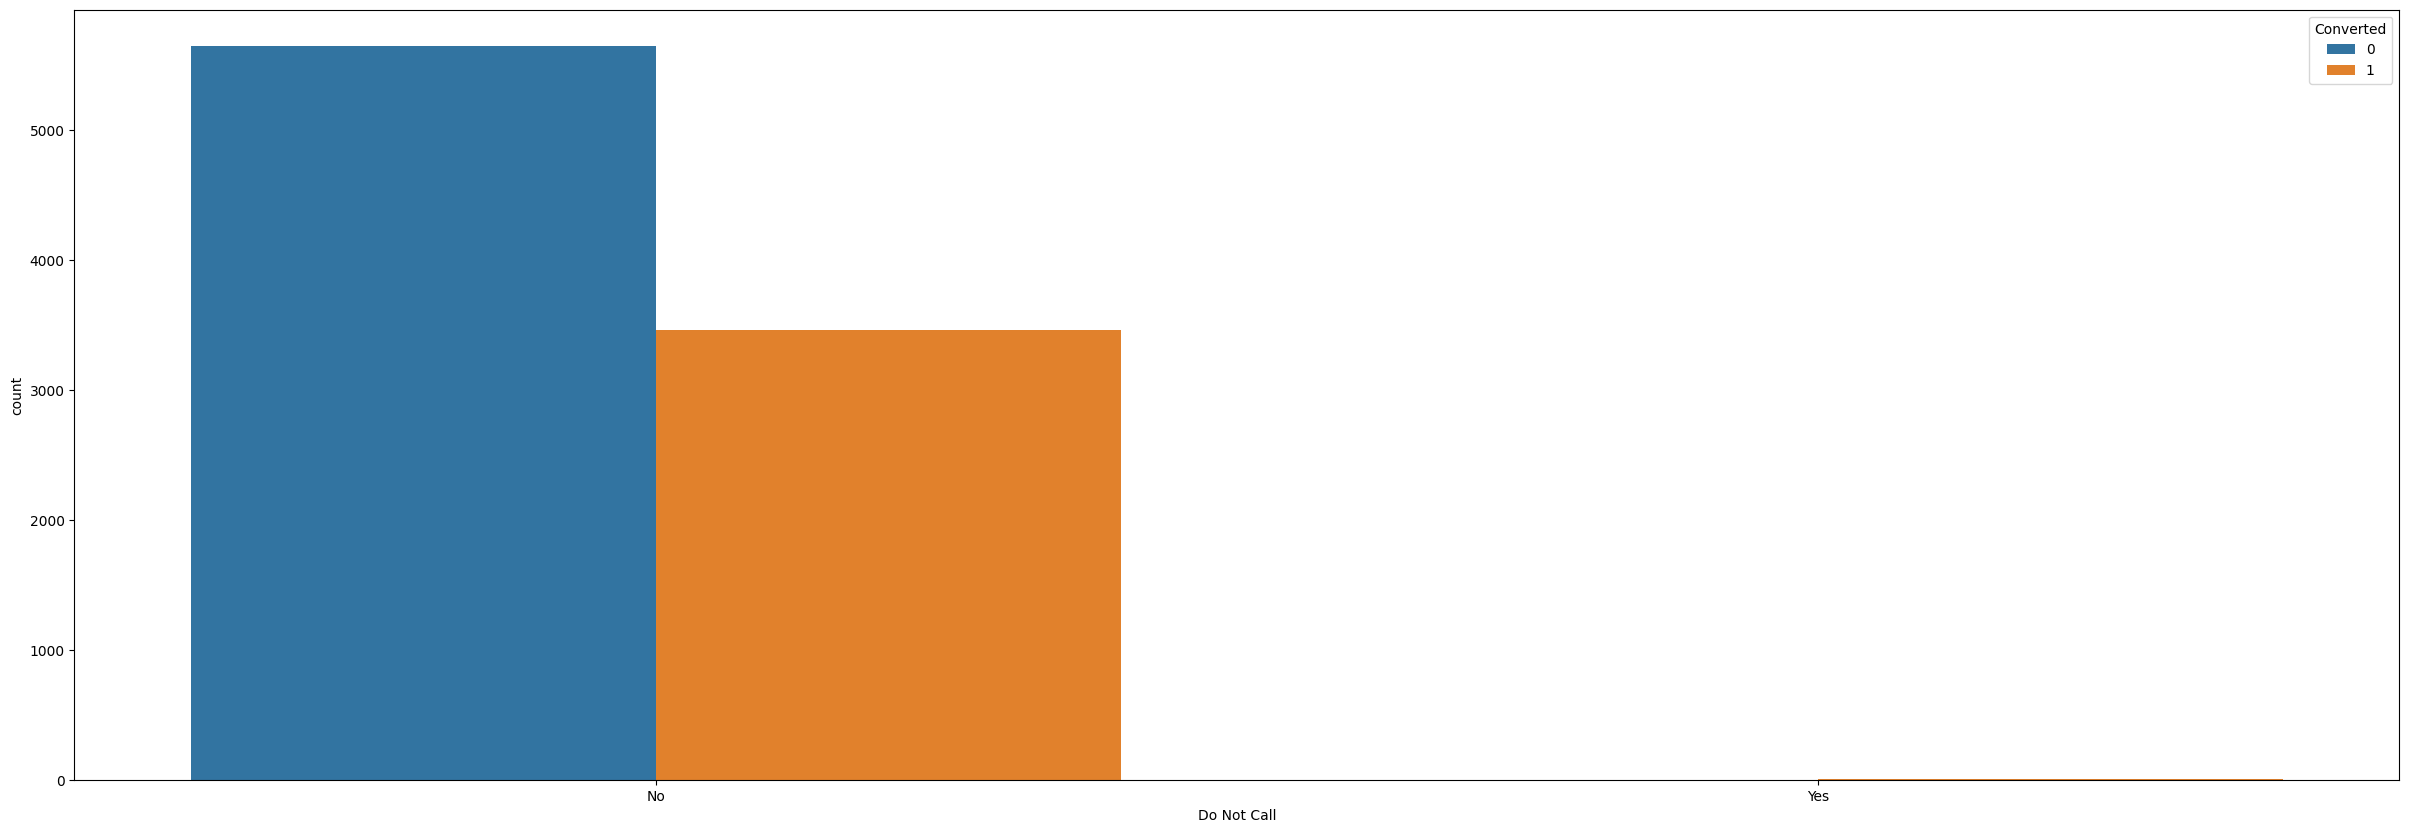

Last Activity


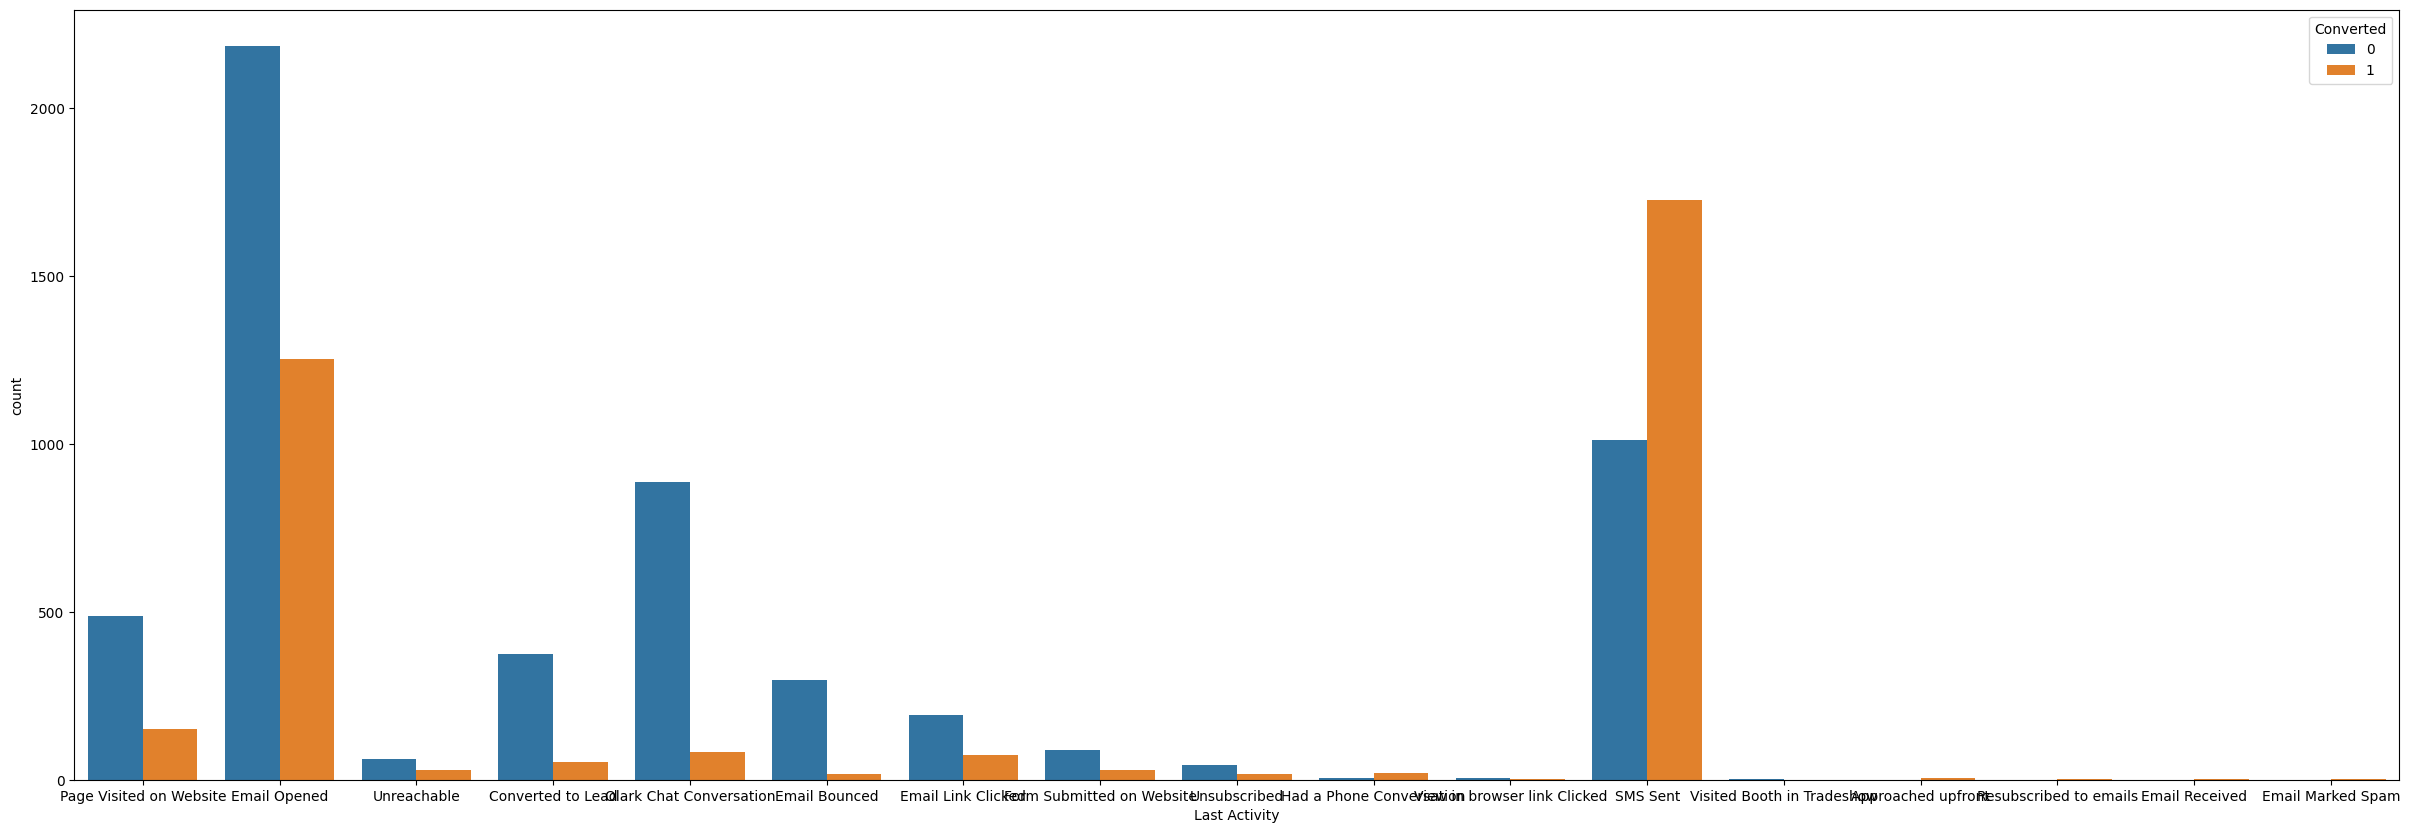

Country


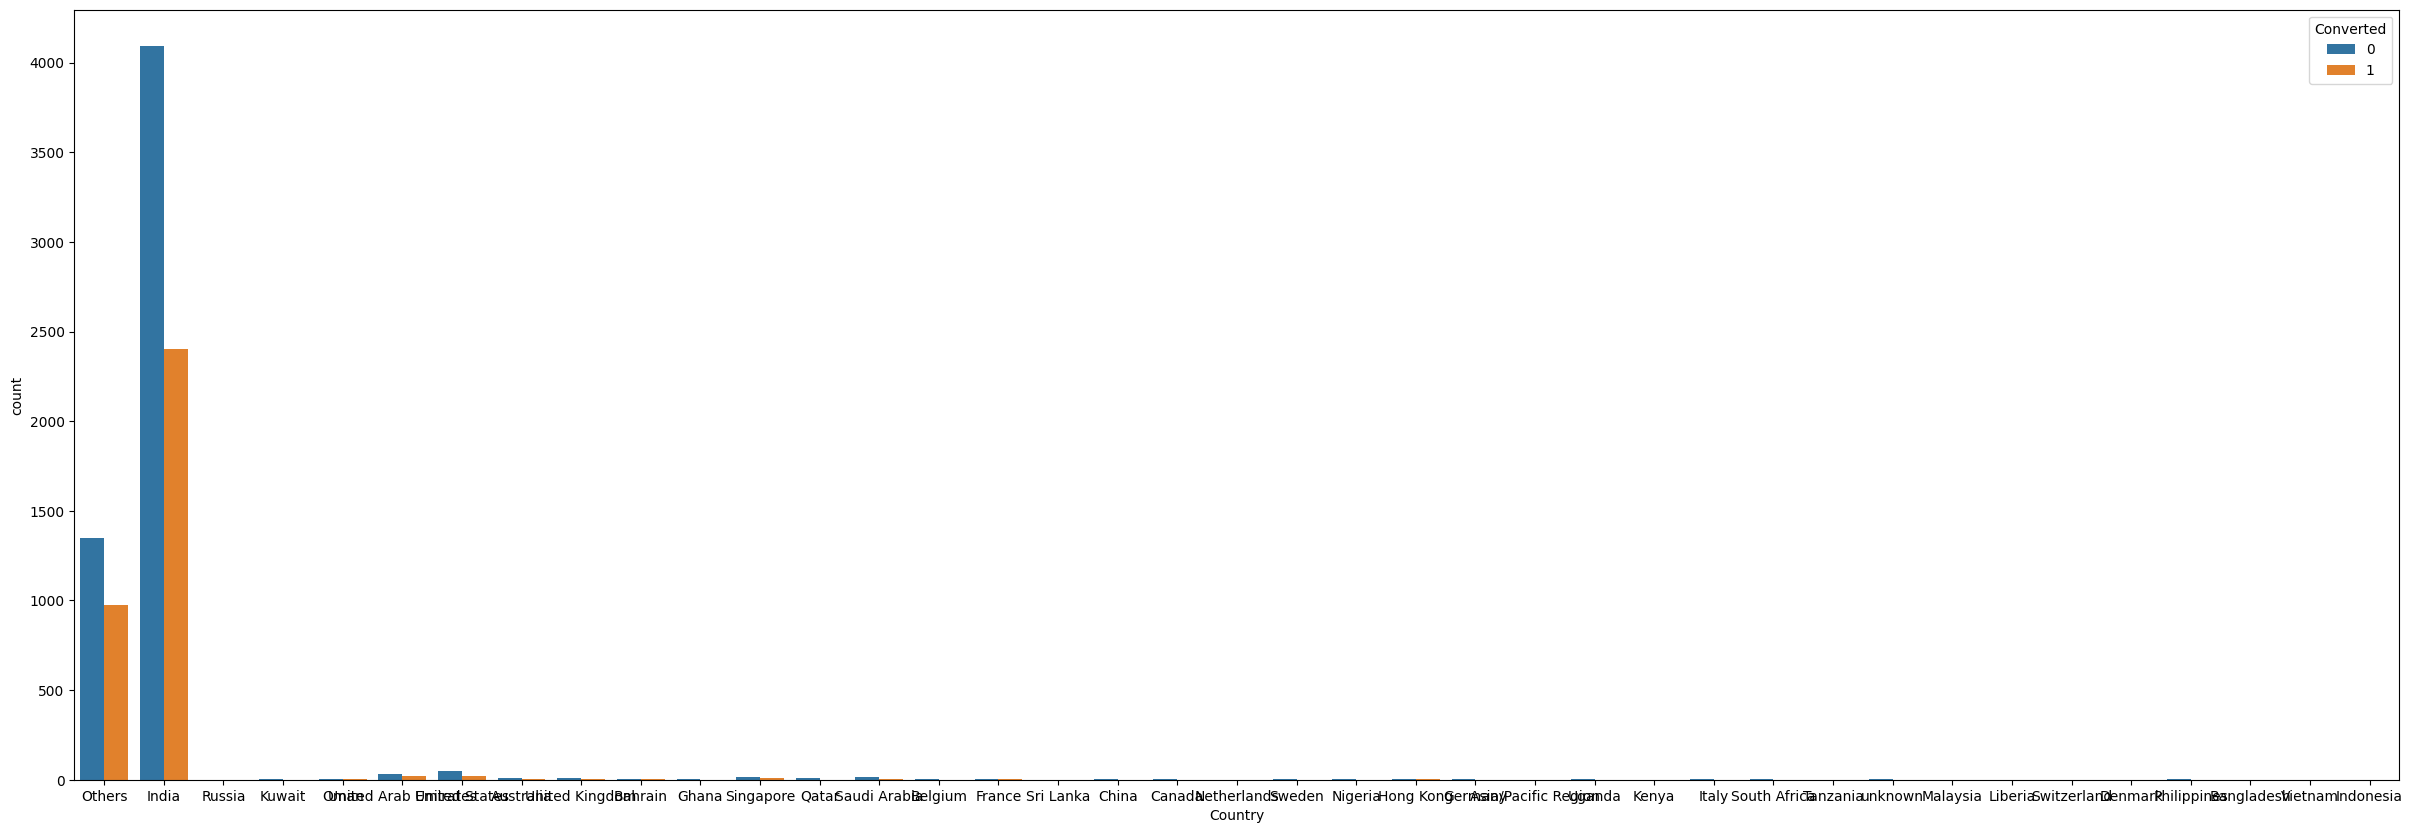

Specialization


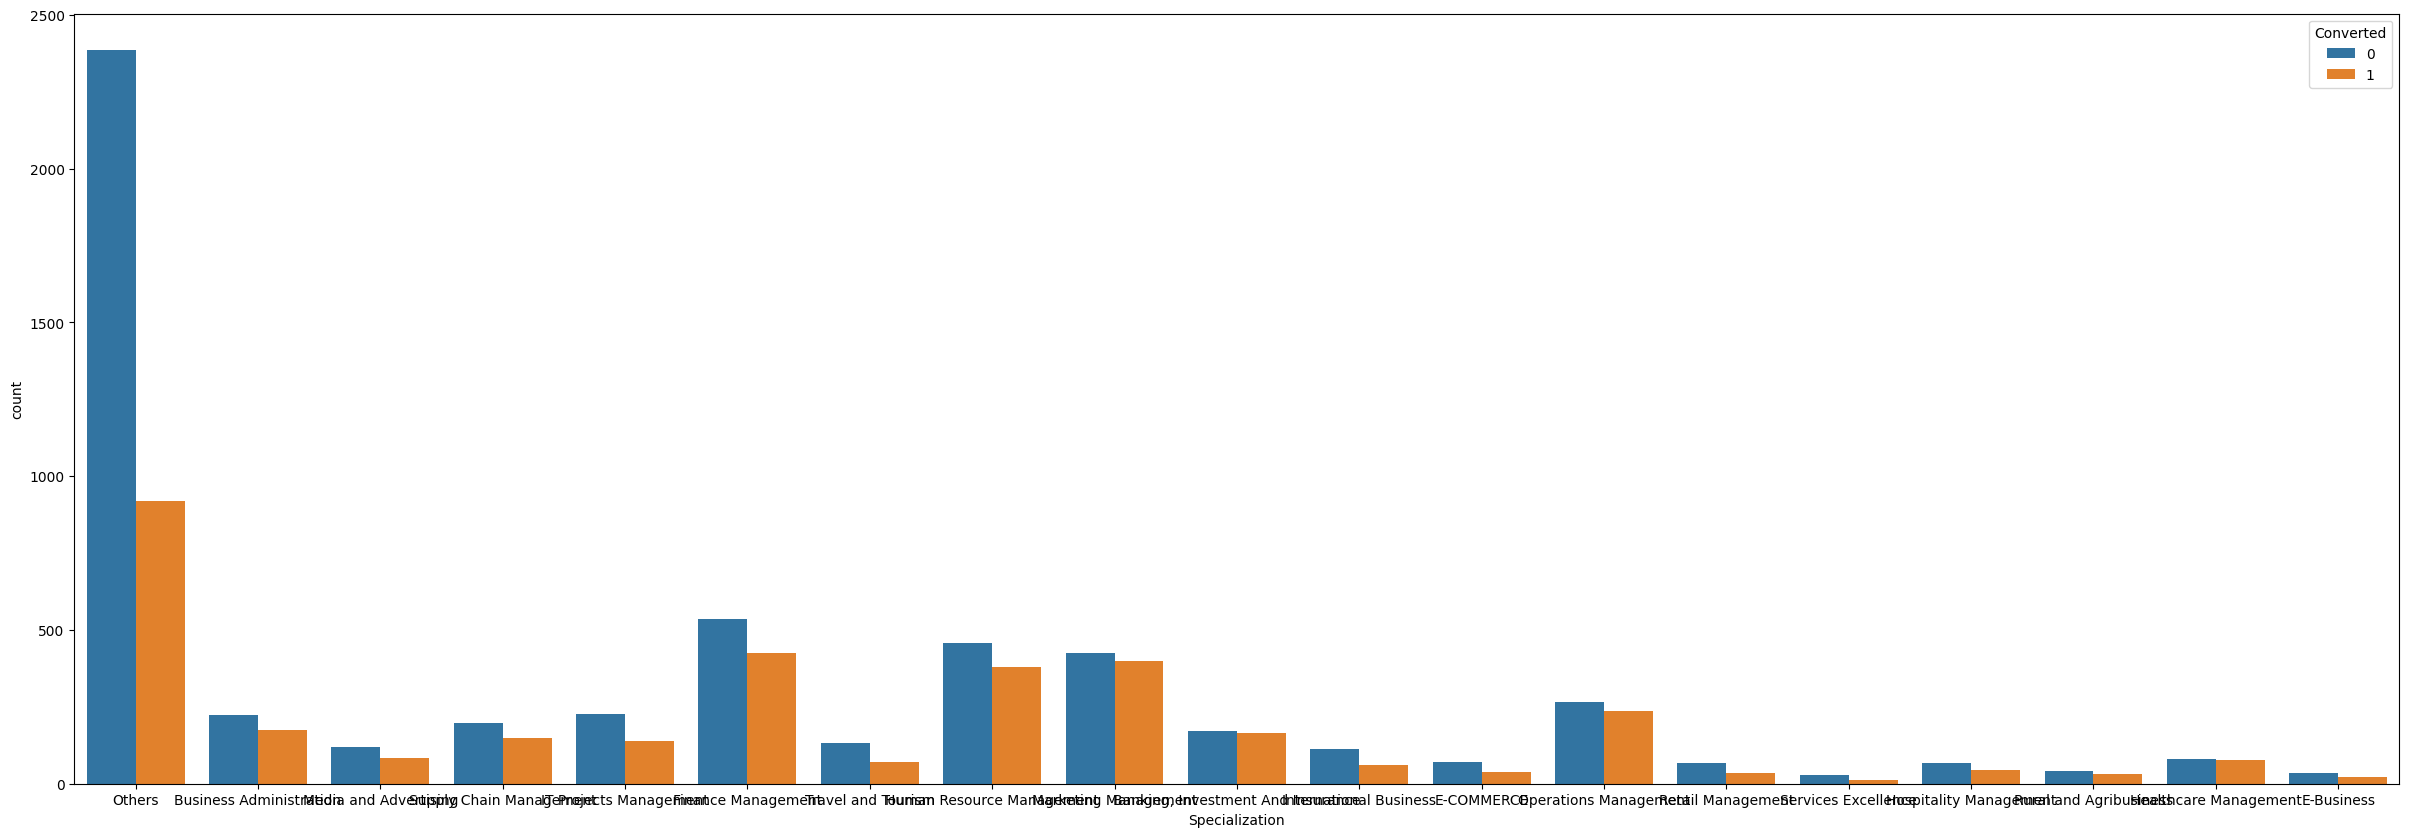

What is your current occupation


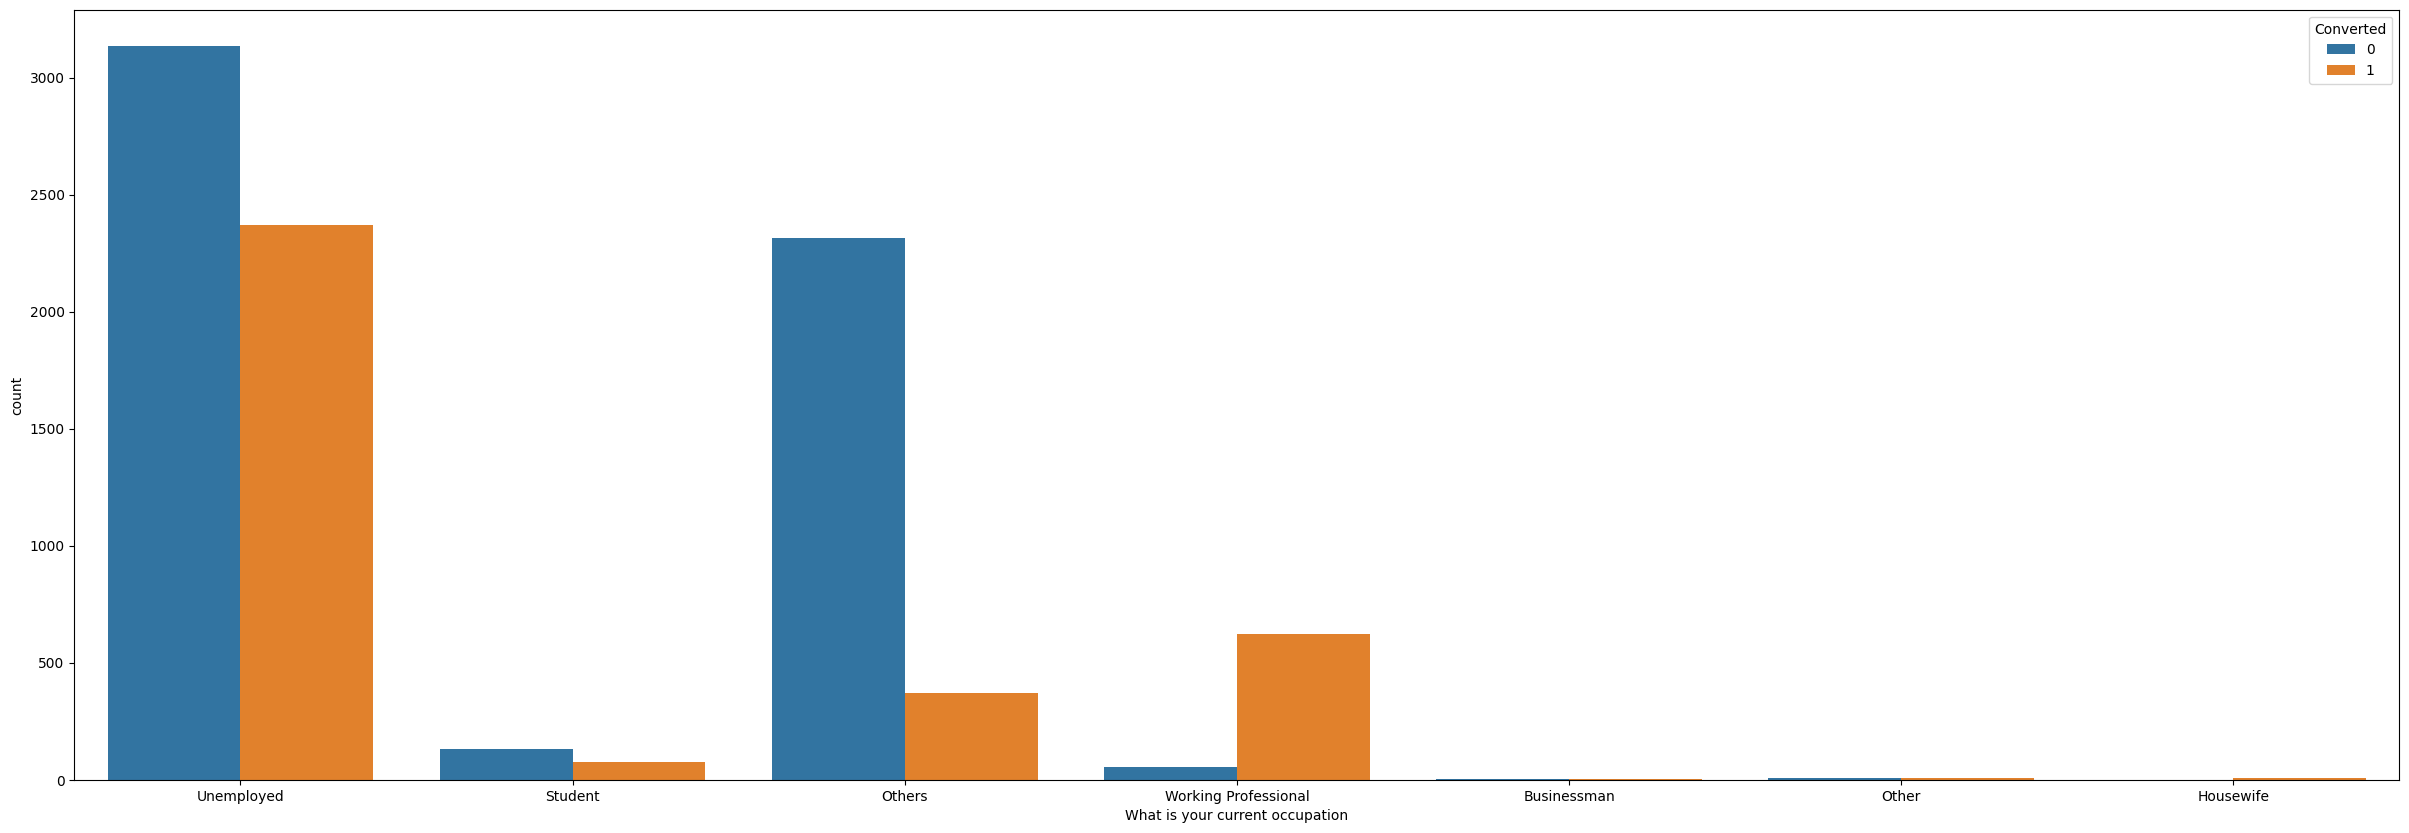

What matters most to you in choosing a course


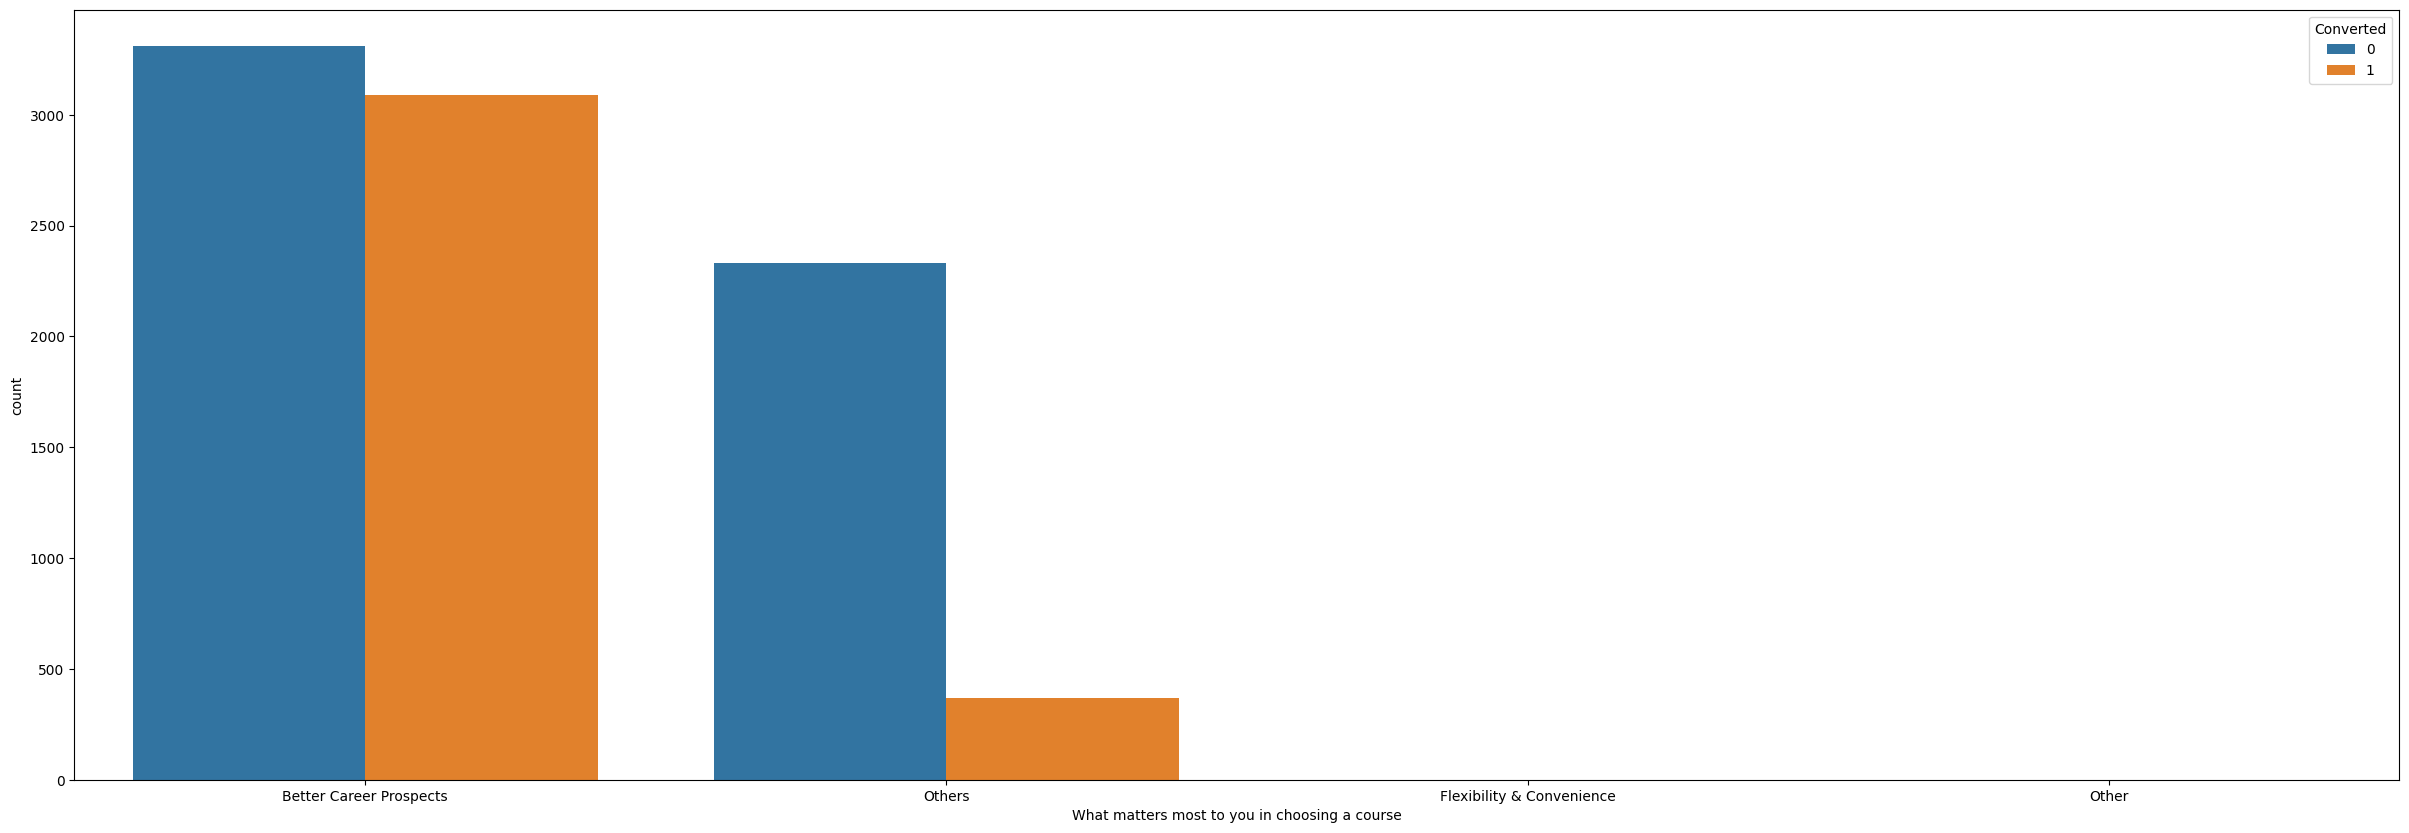

Search


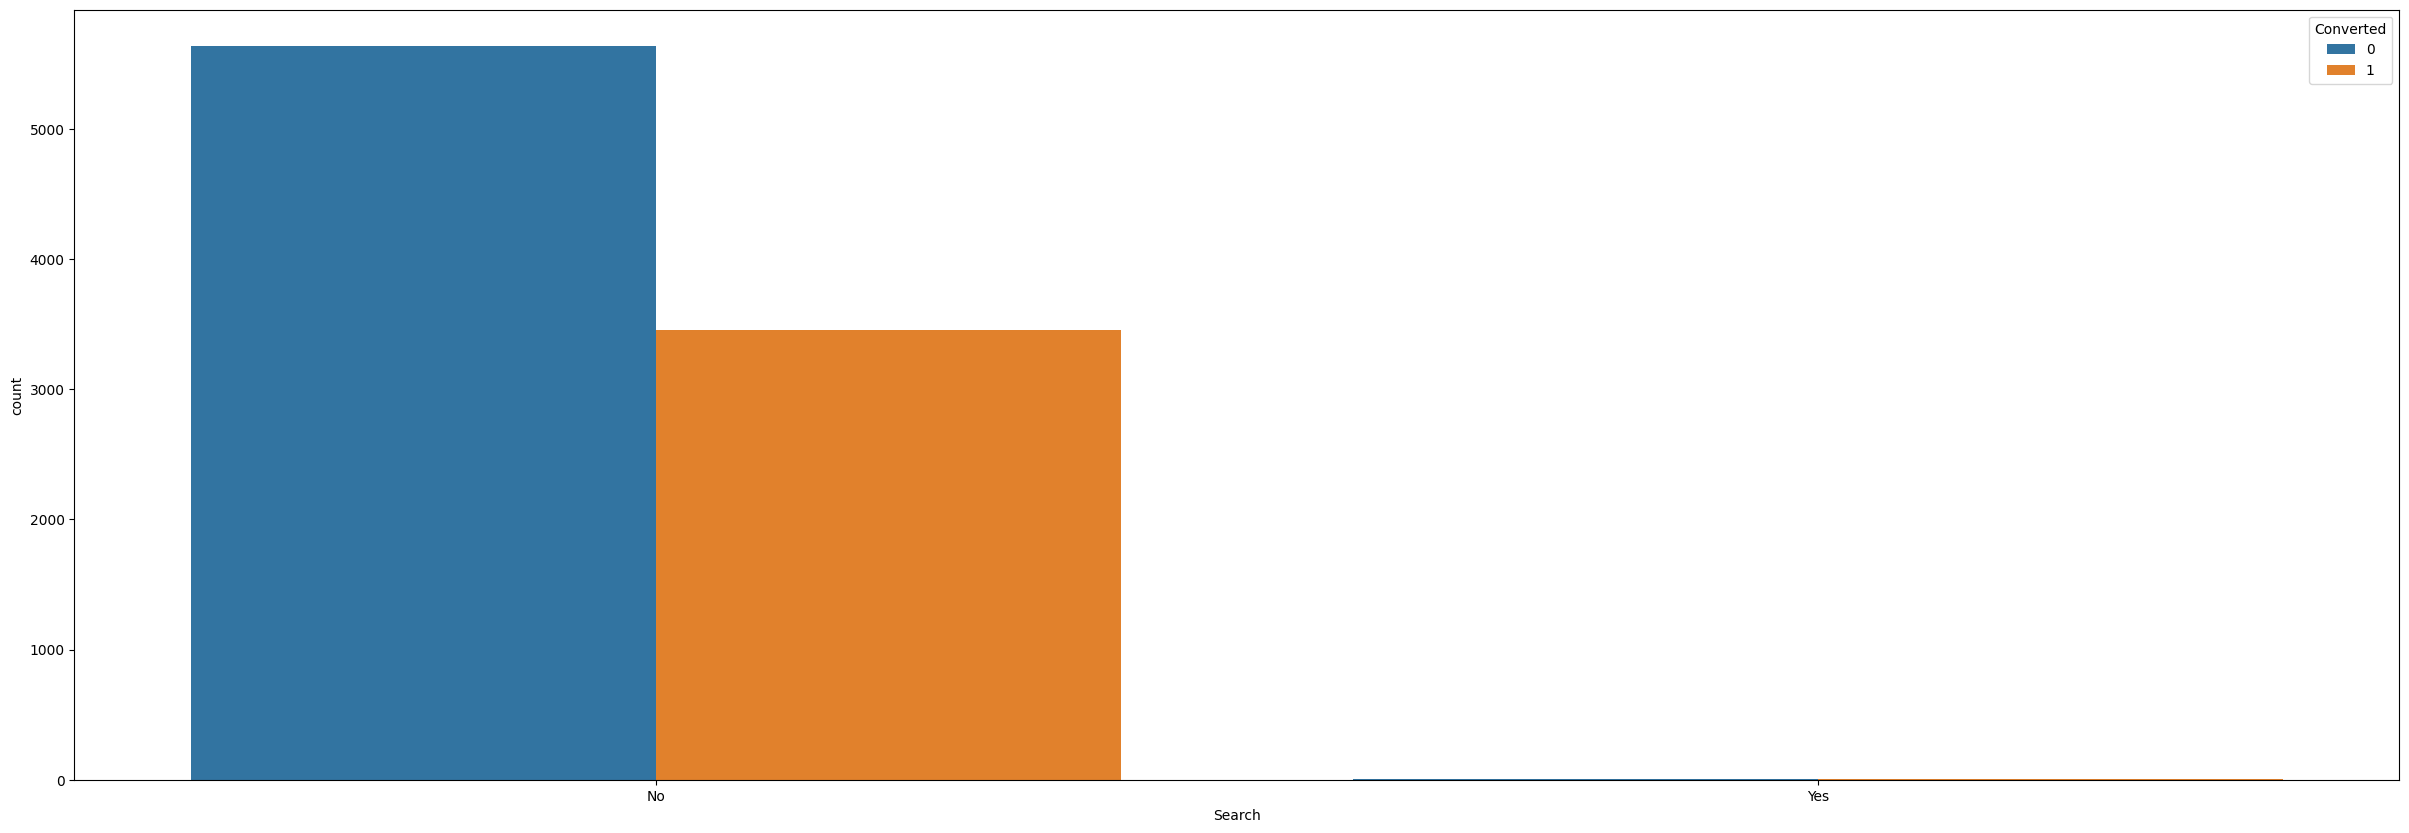

Magazine


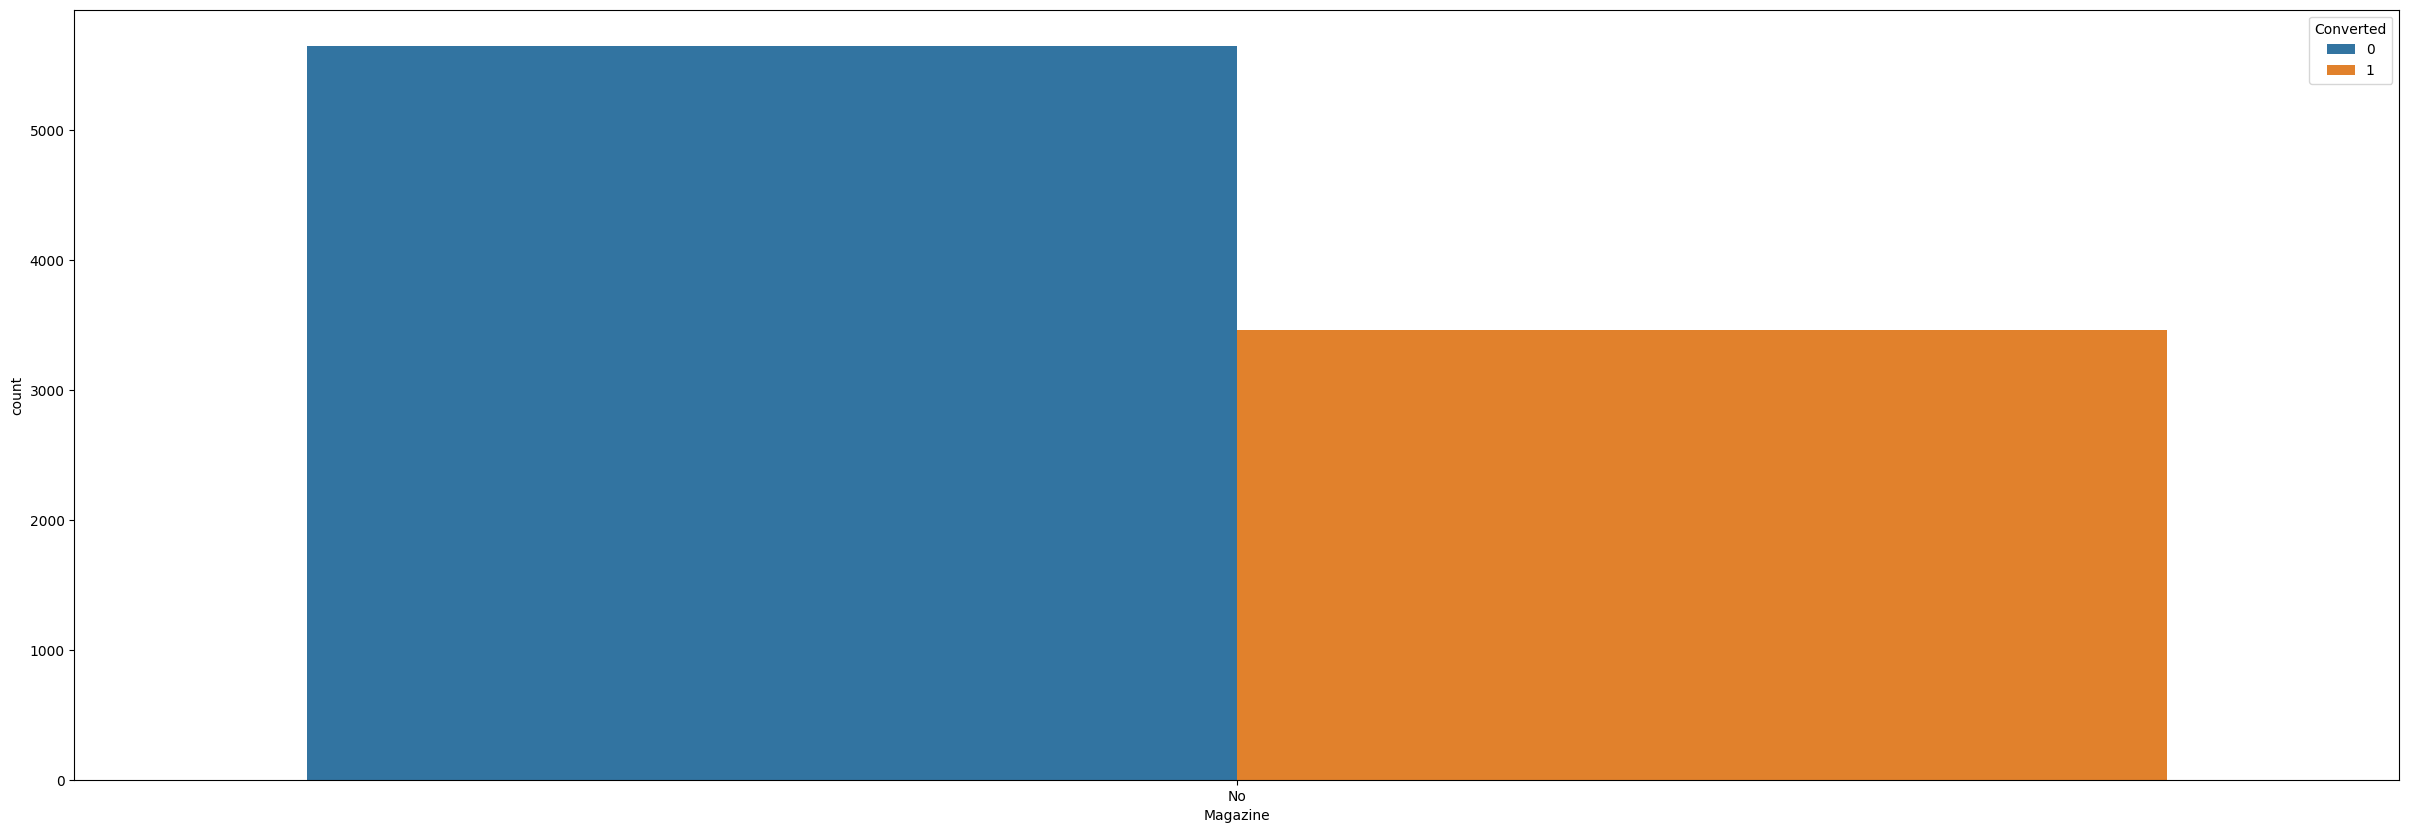

Newspaper Article


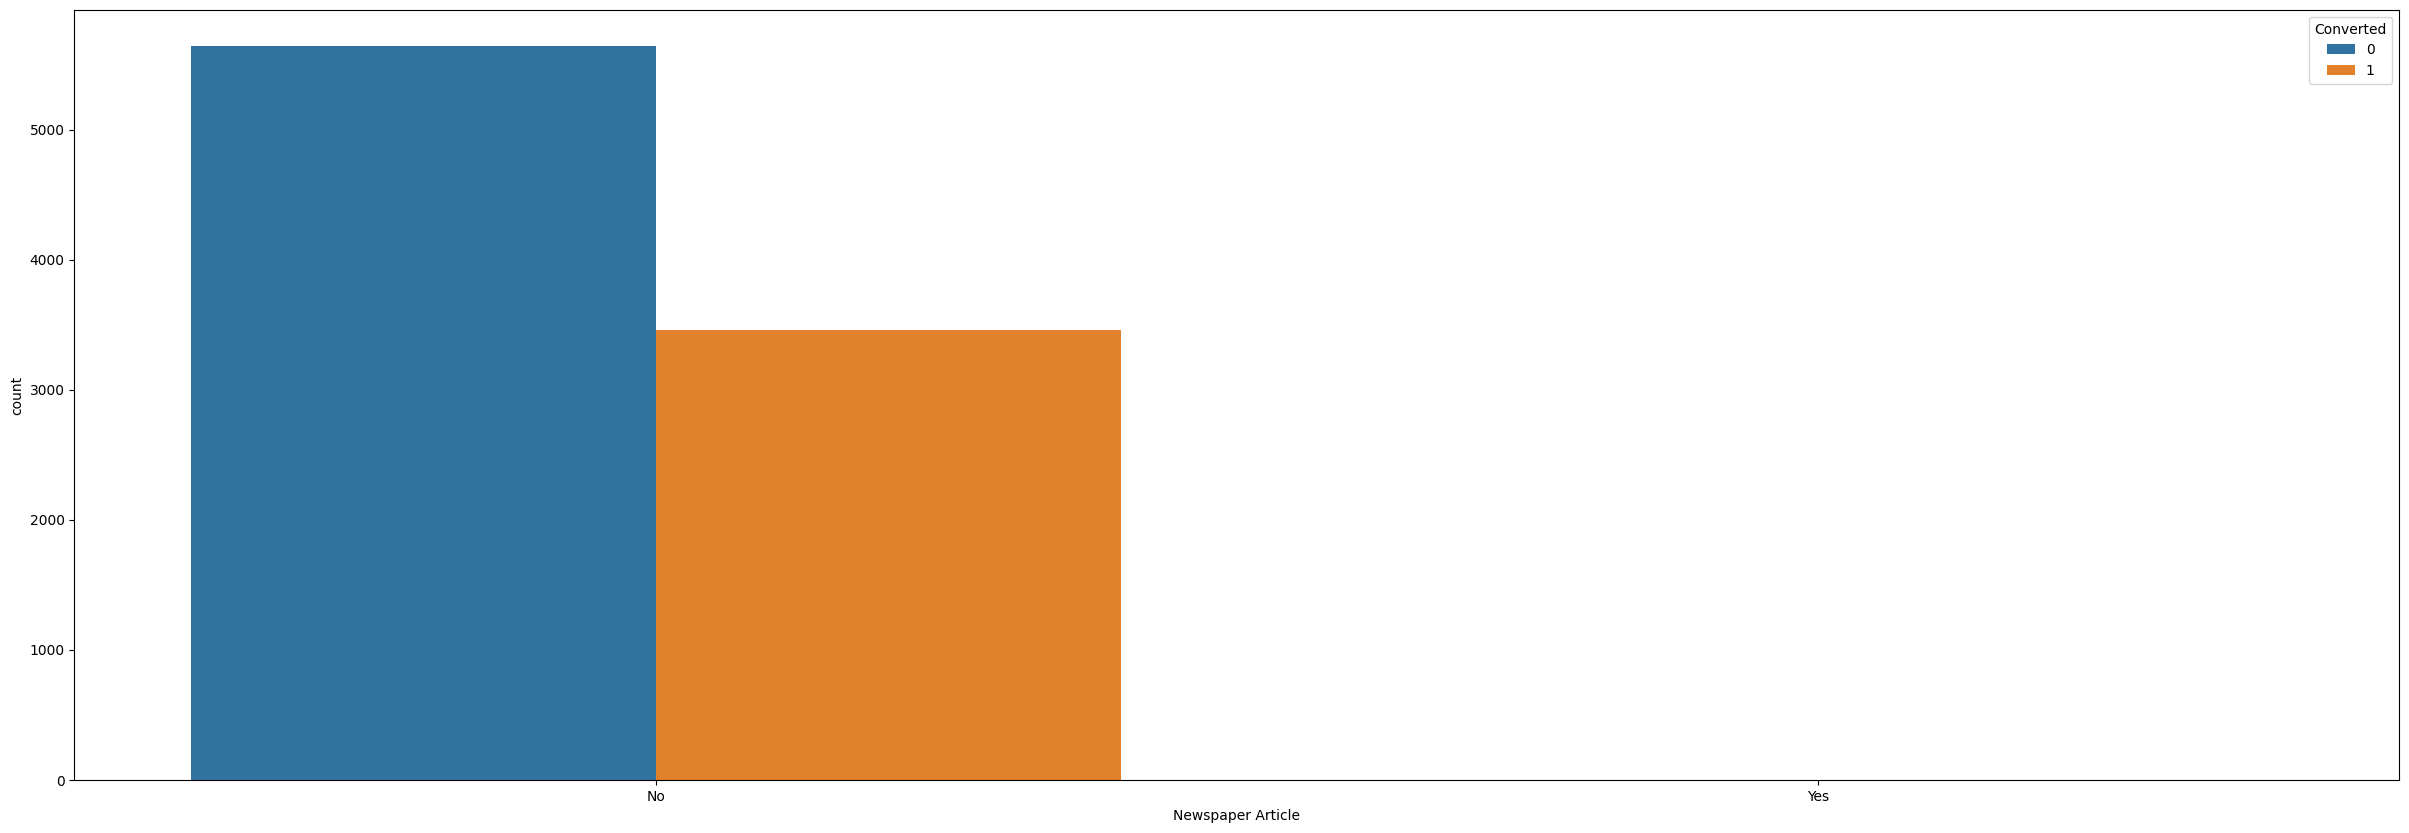

X Education Forums


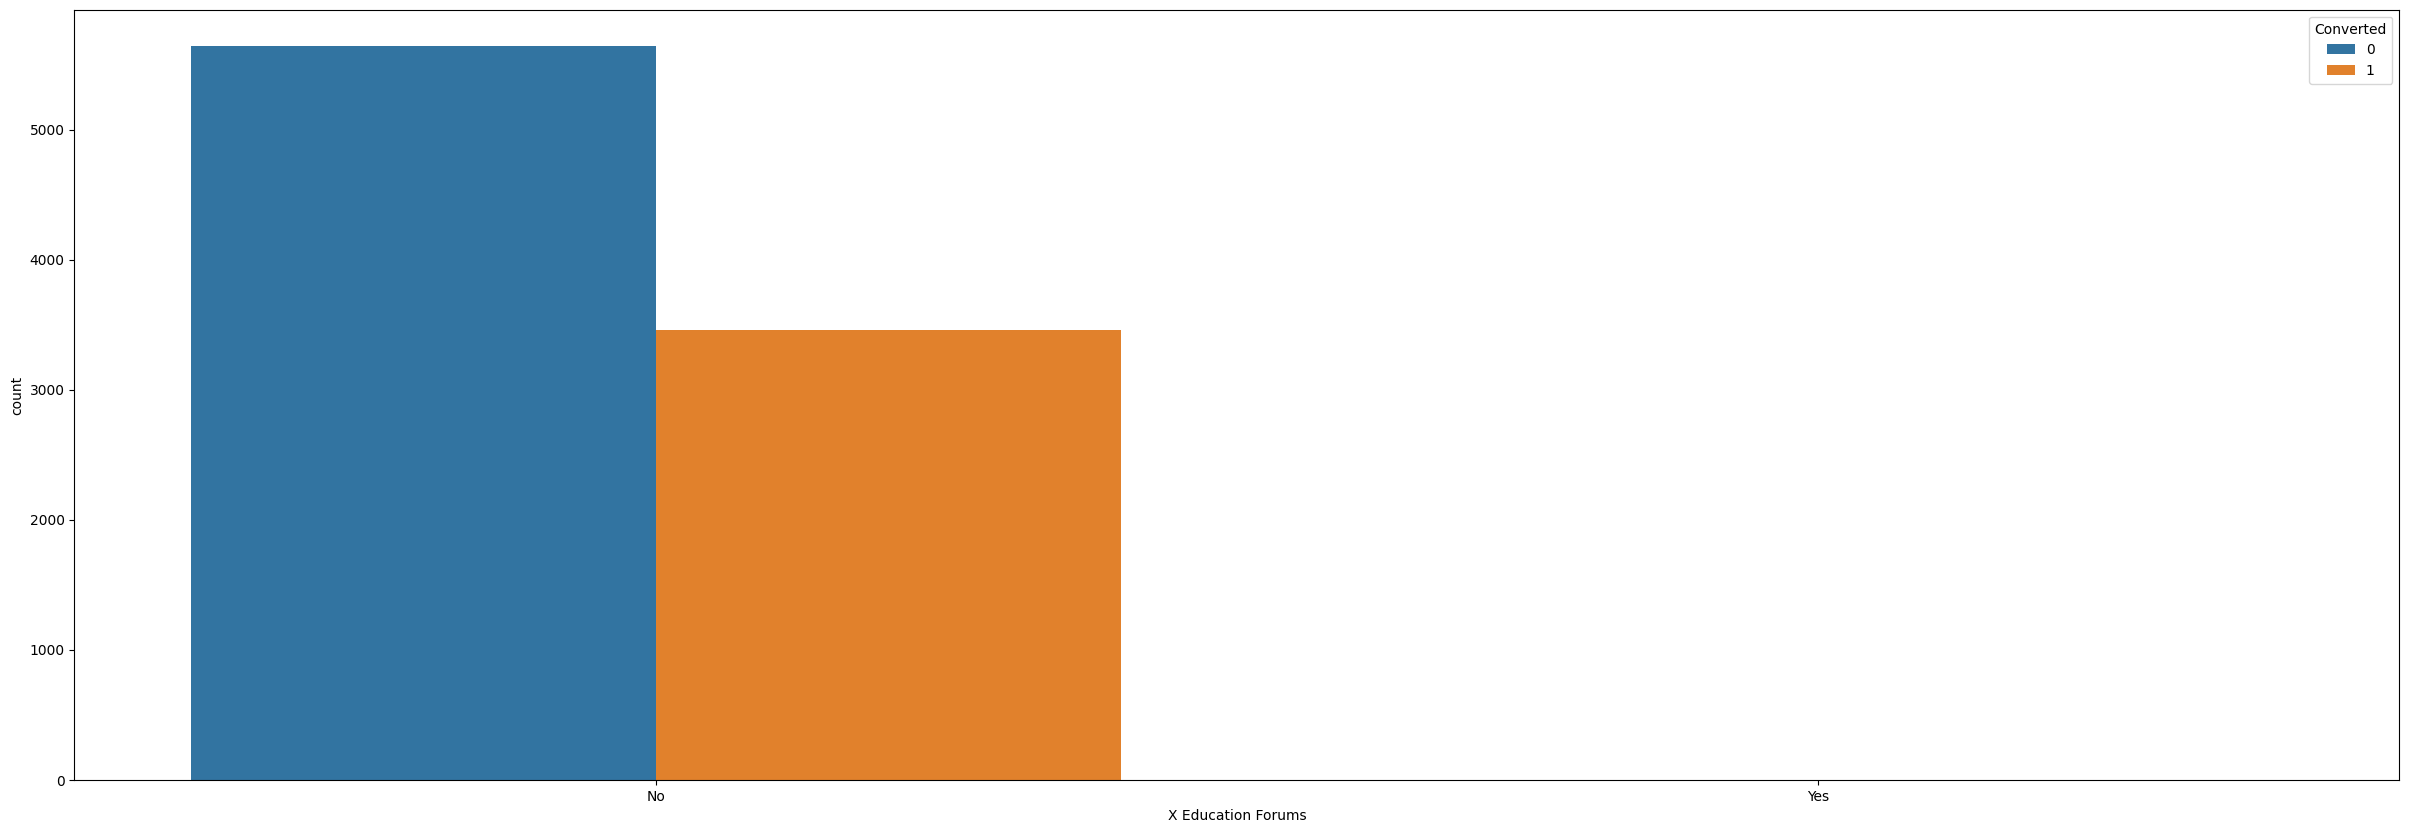

Newspaper


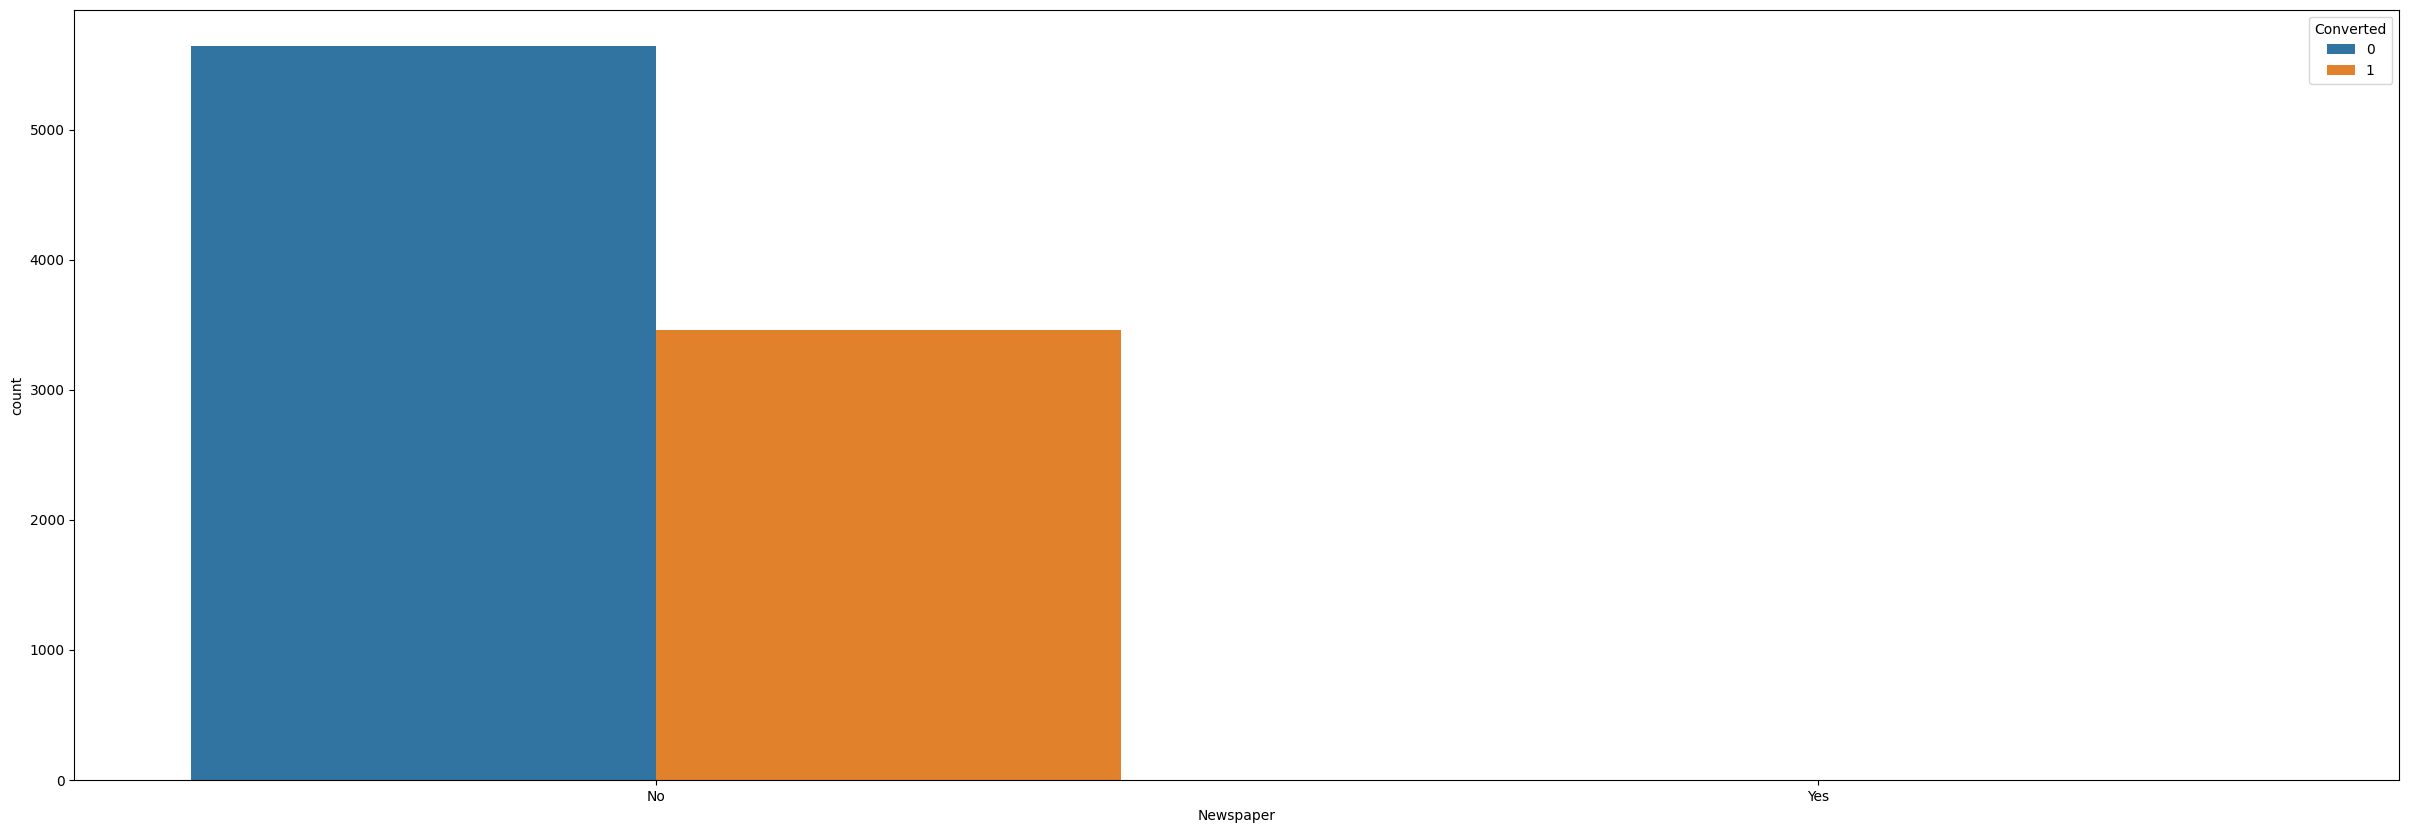

Digital Advertisement


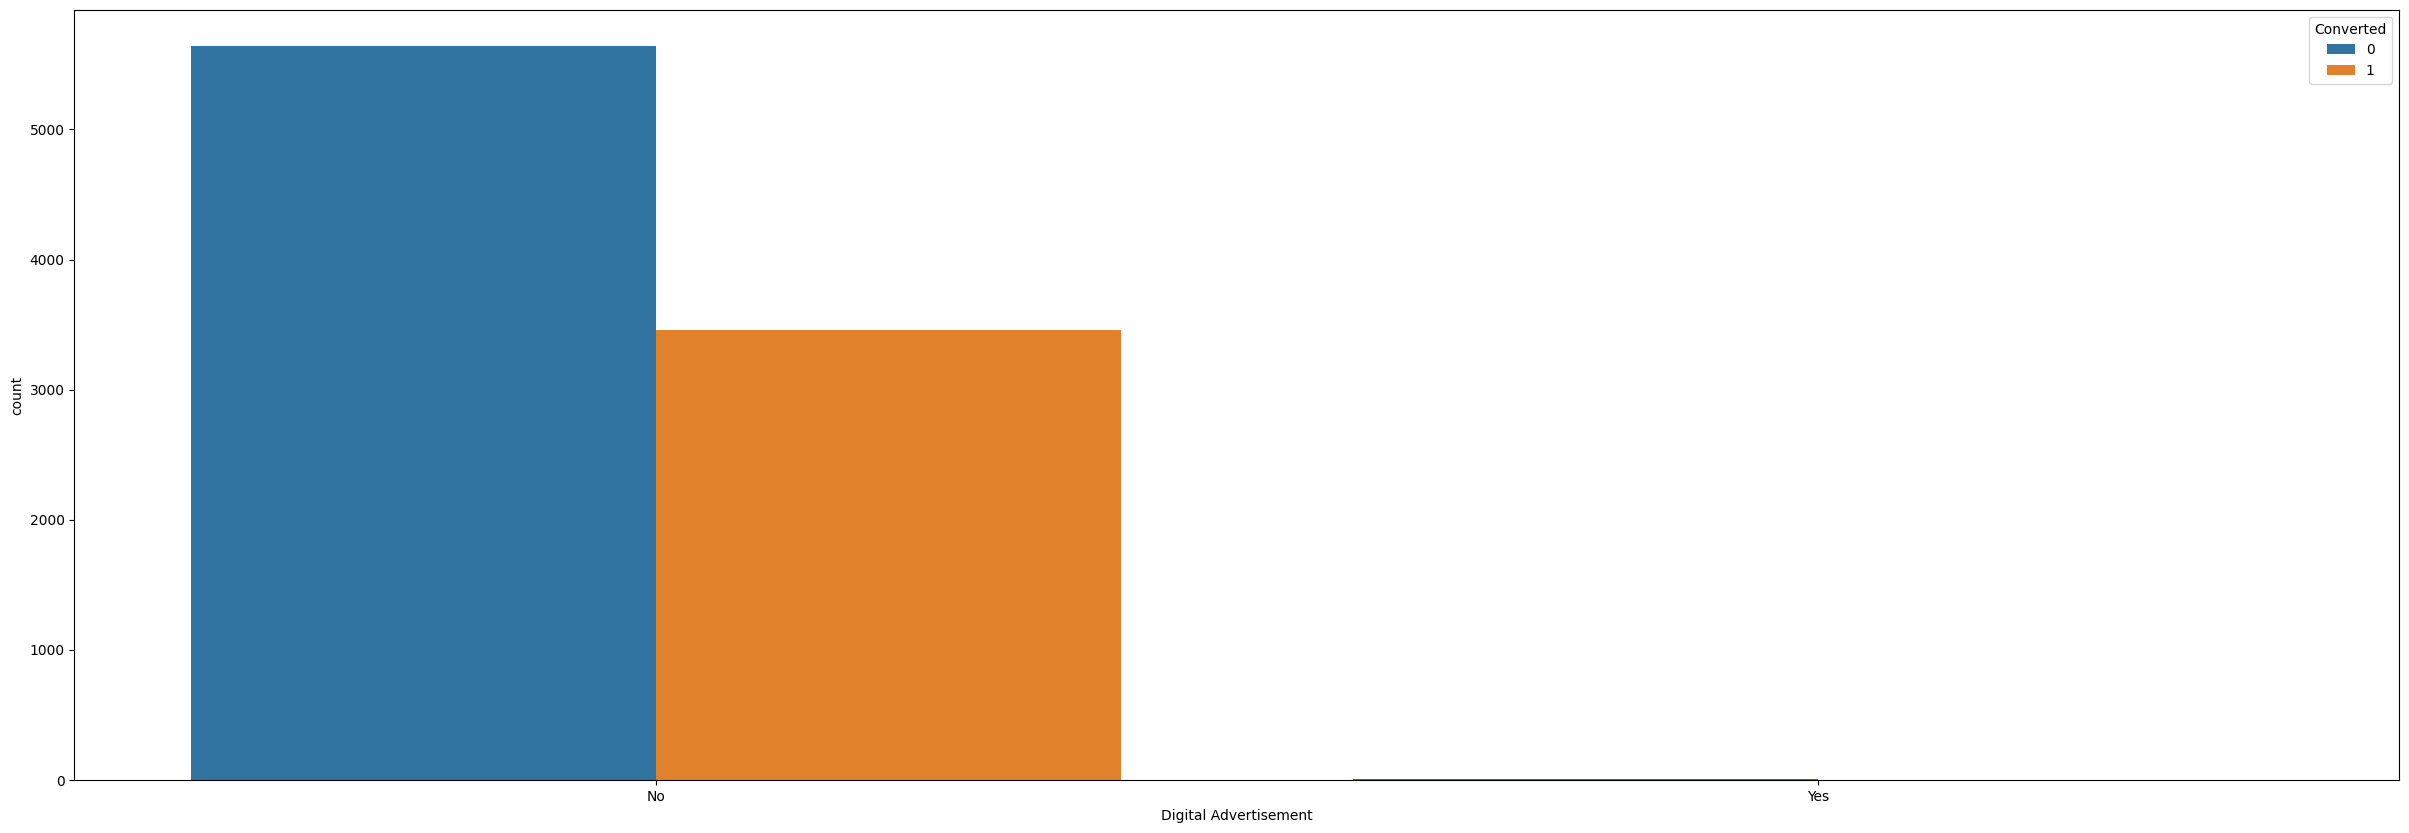

Through Recommendations


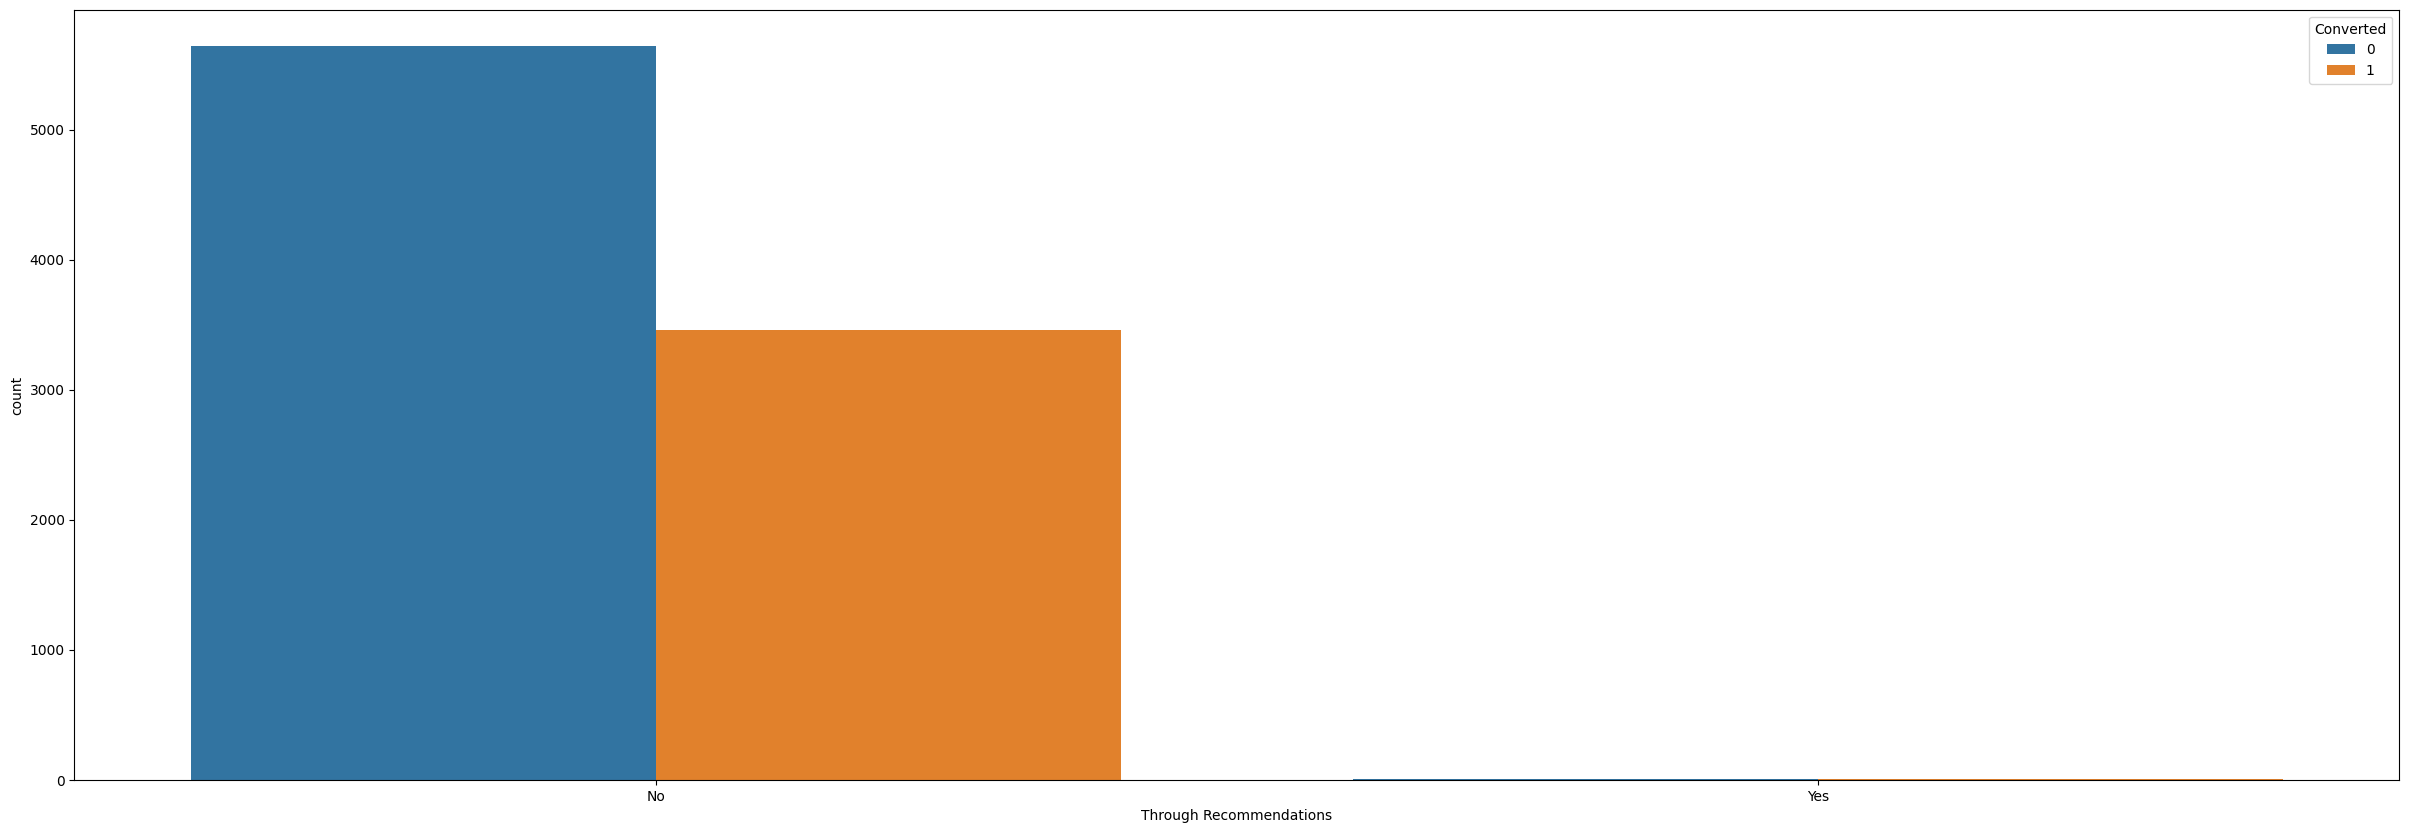

Receive More Updates About Our Courses


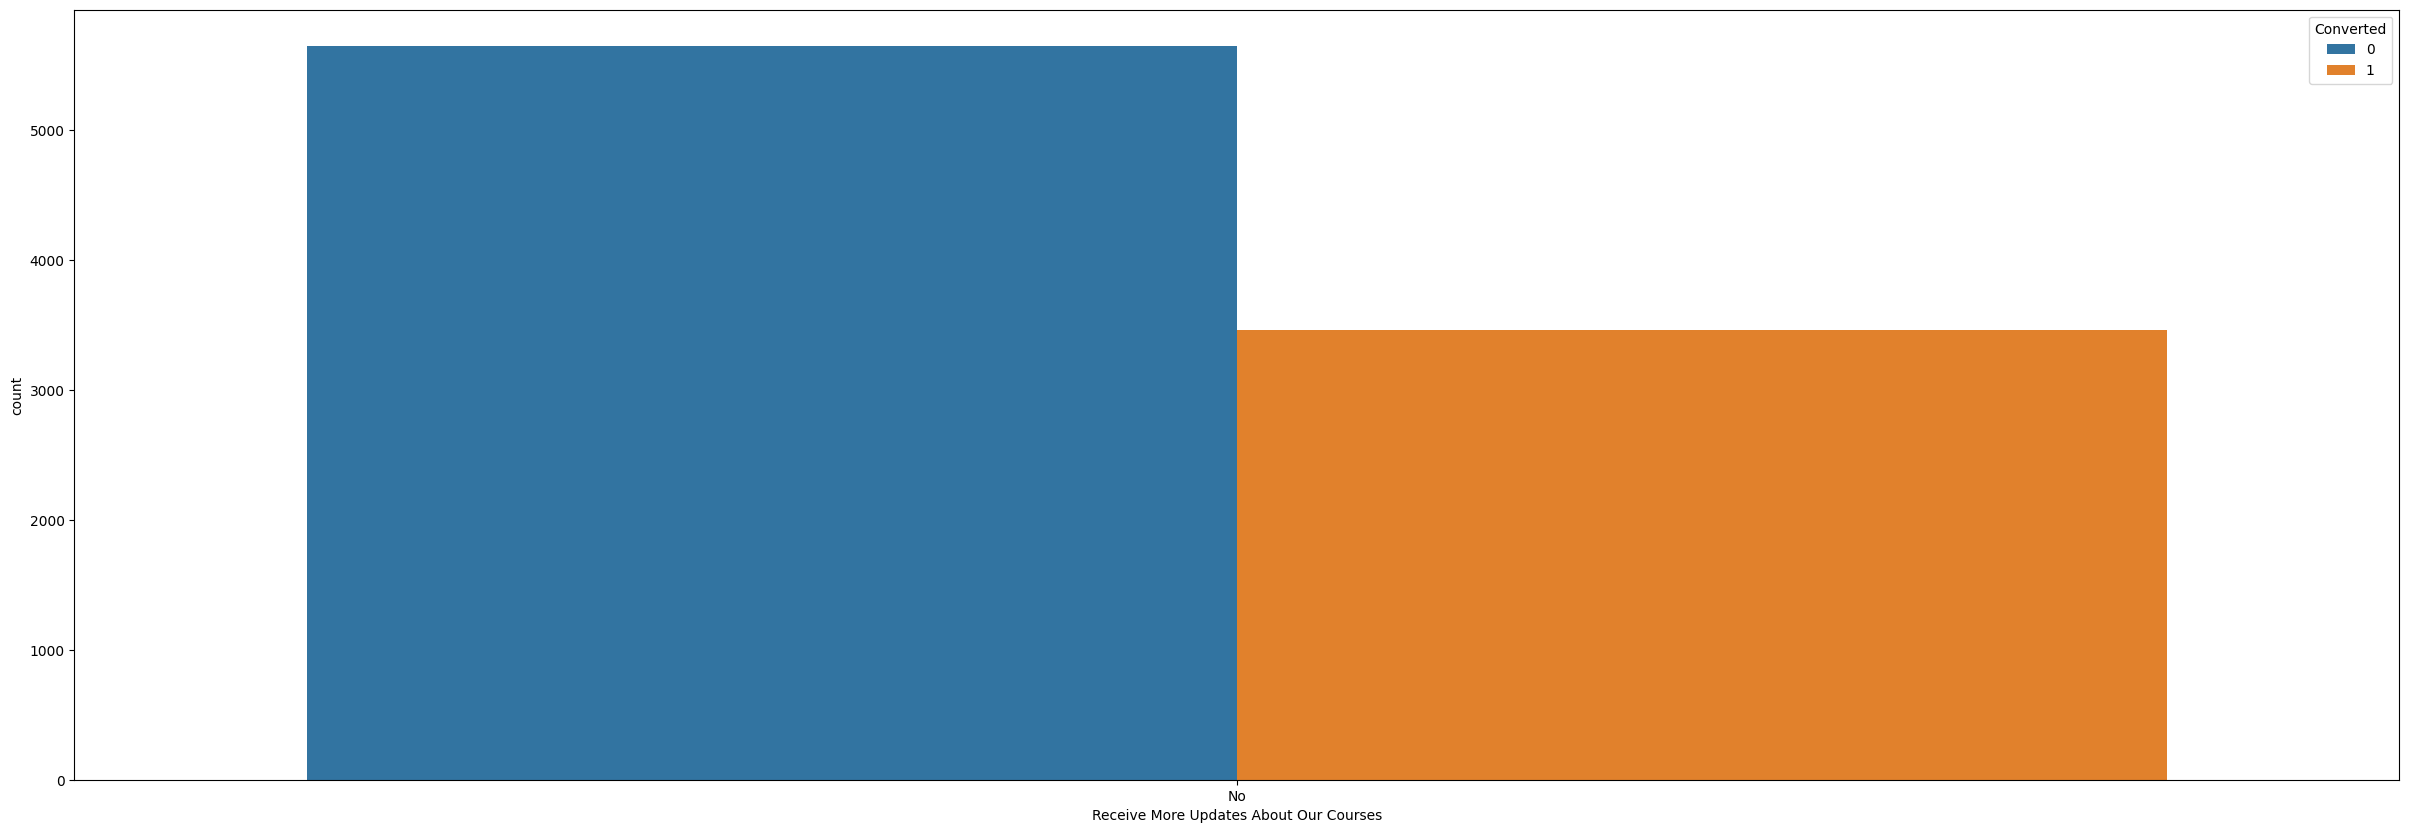

Tags


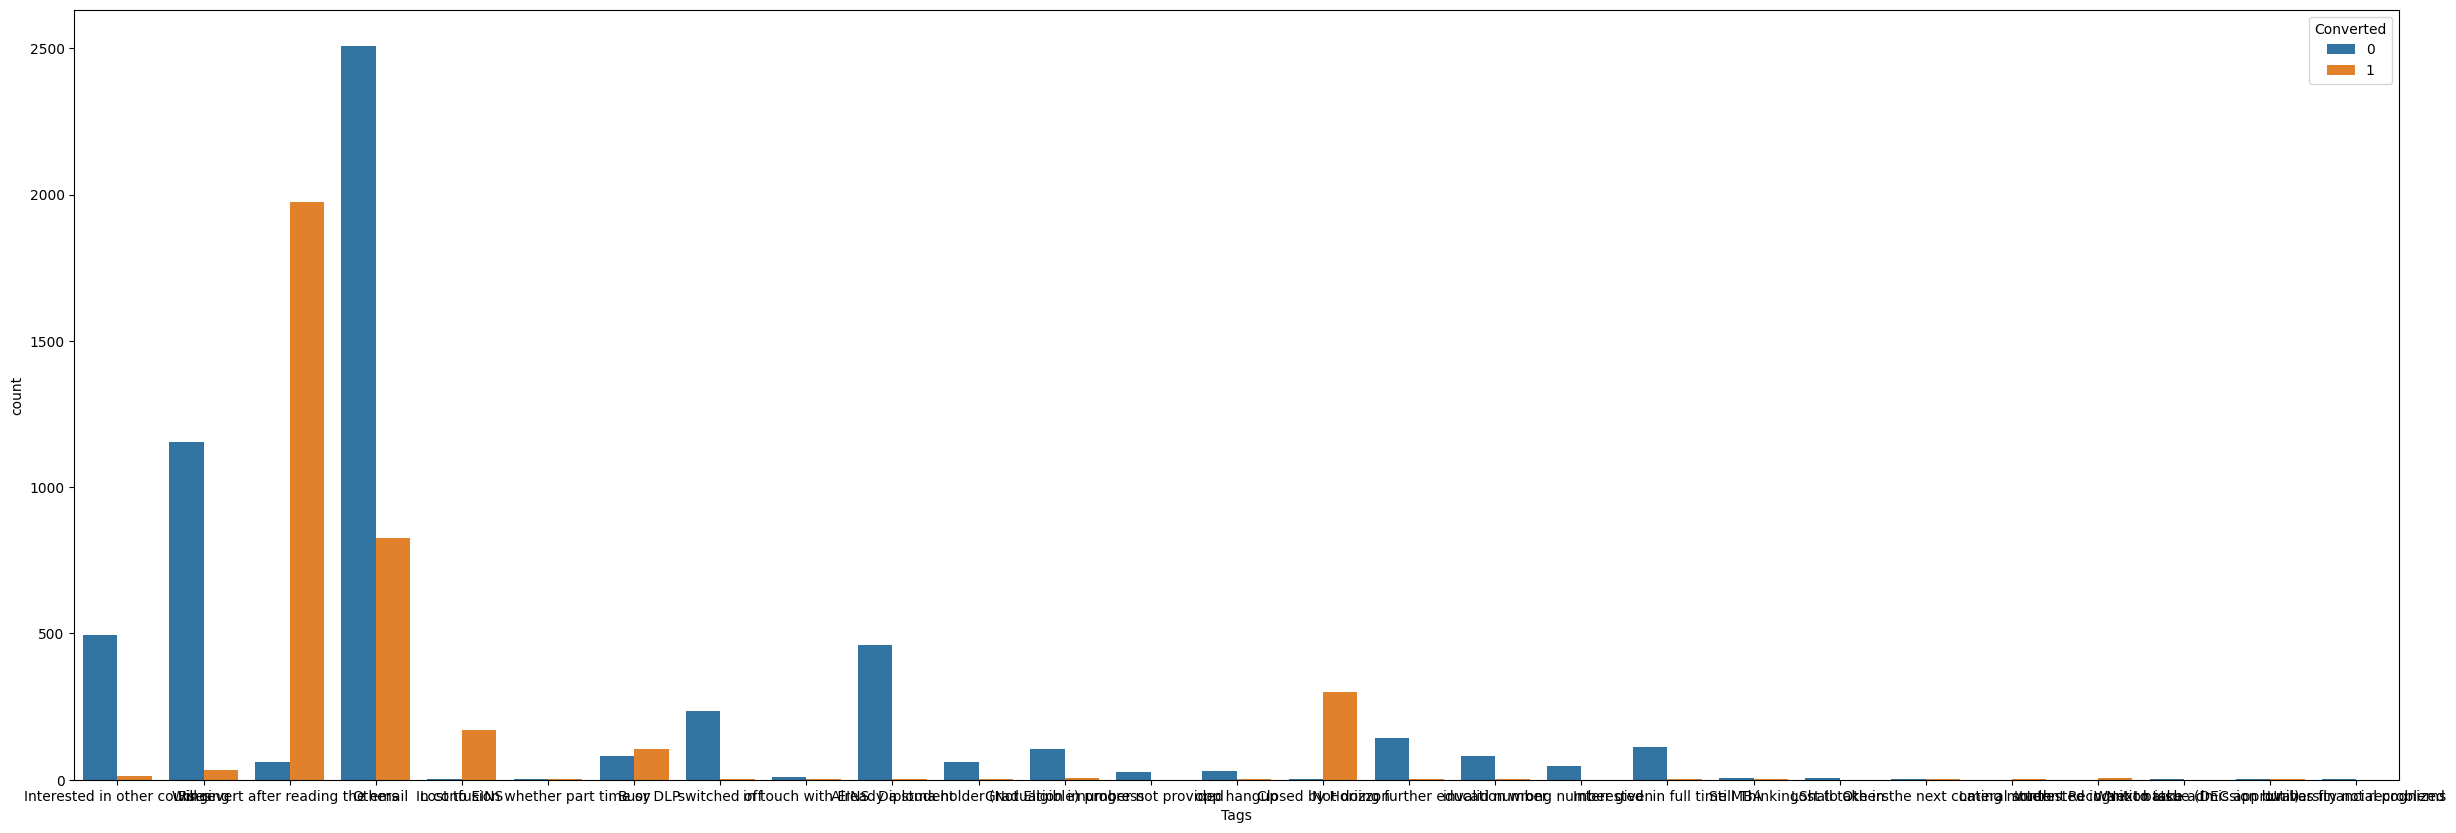

Update me on Supply Chain Content


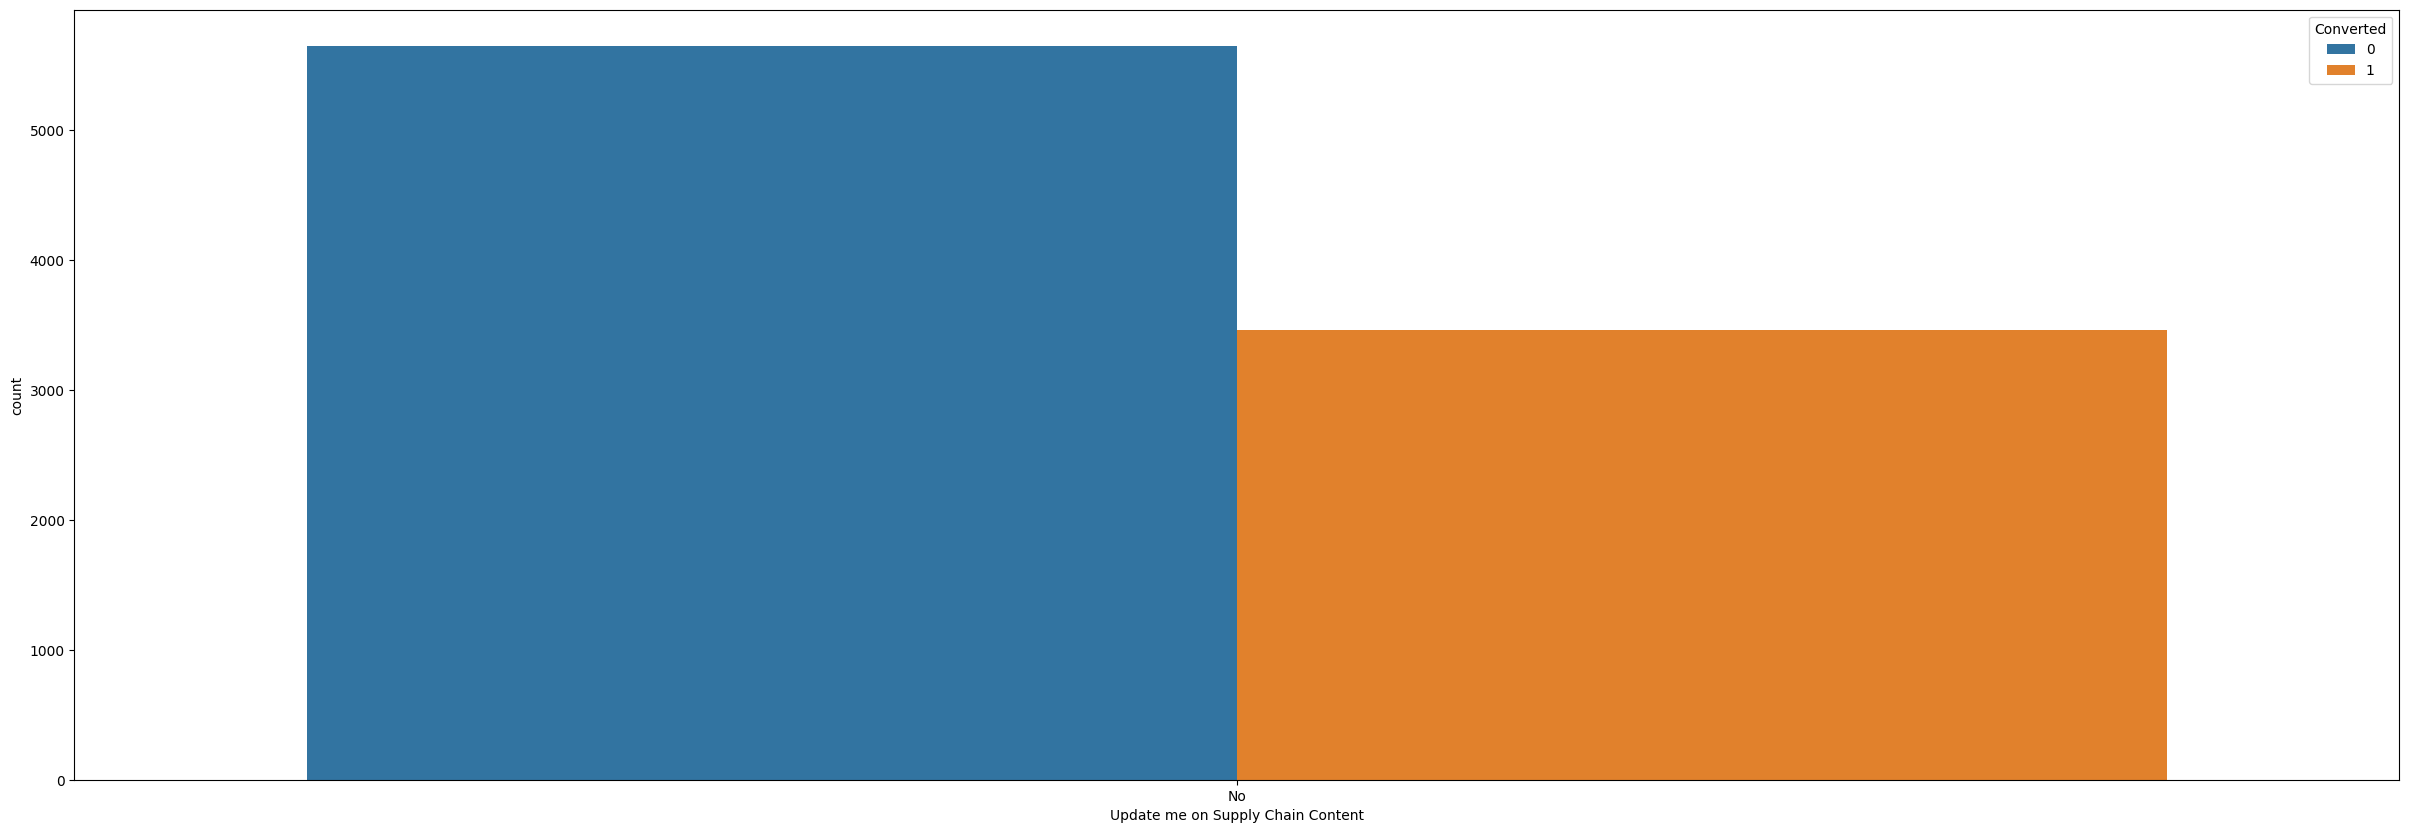

Get updates on DM Content


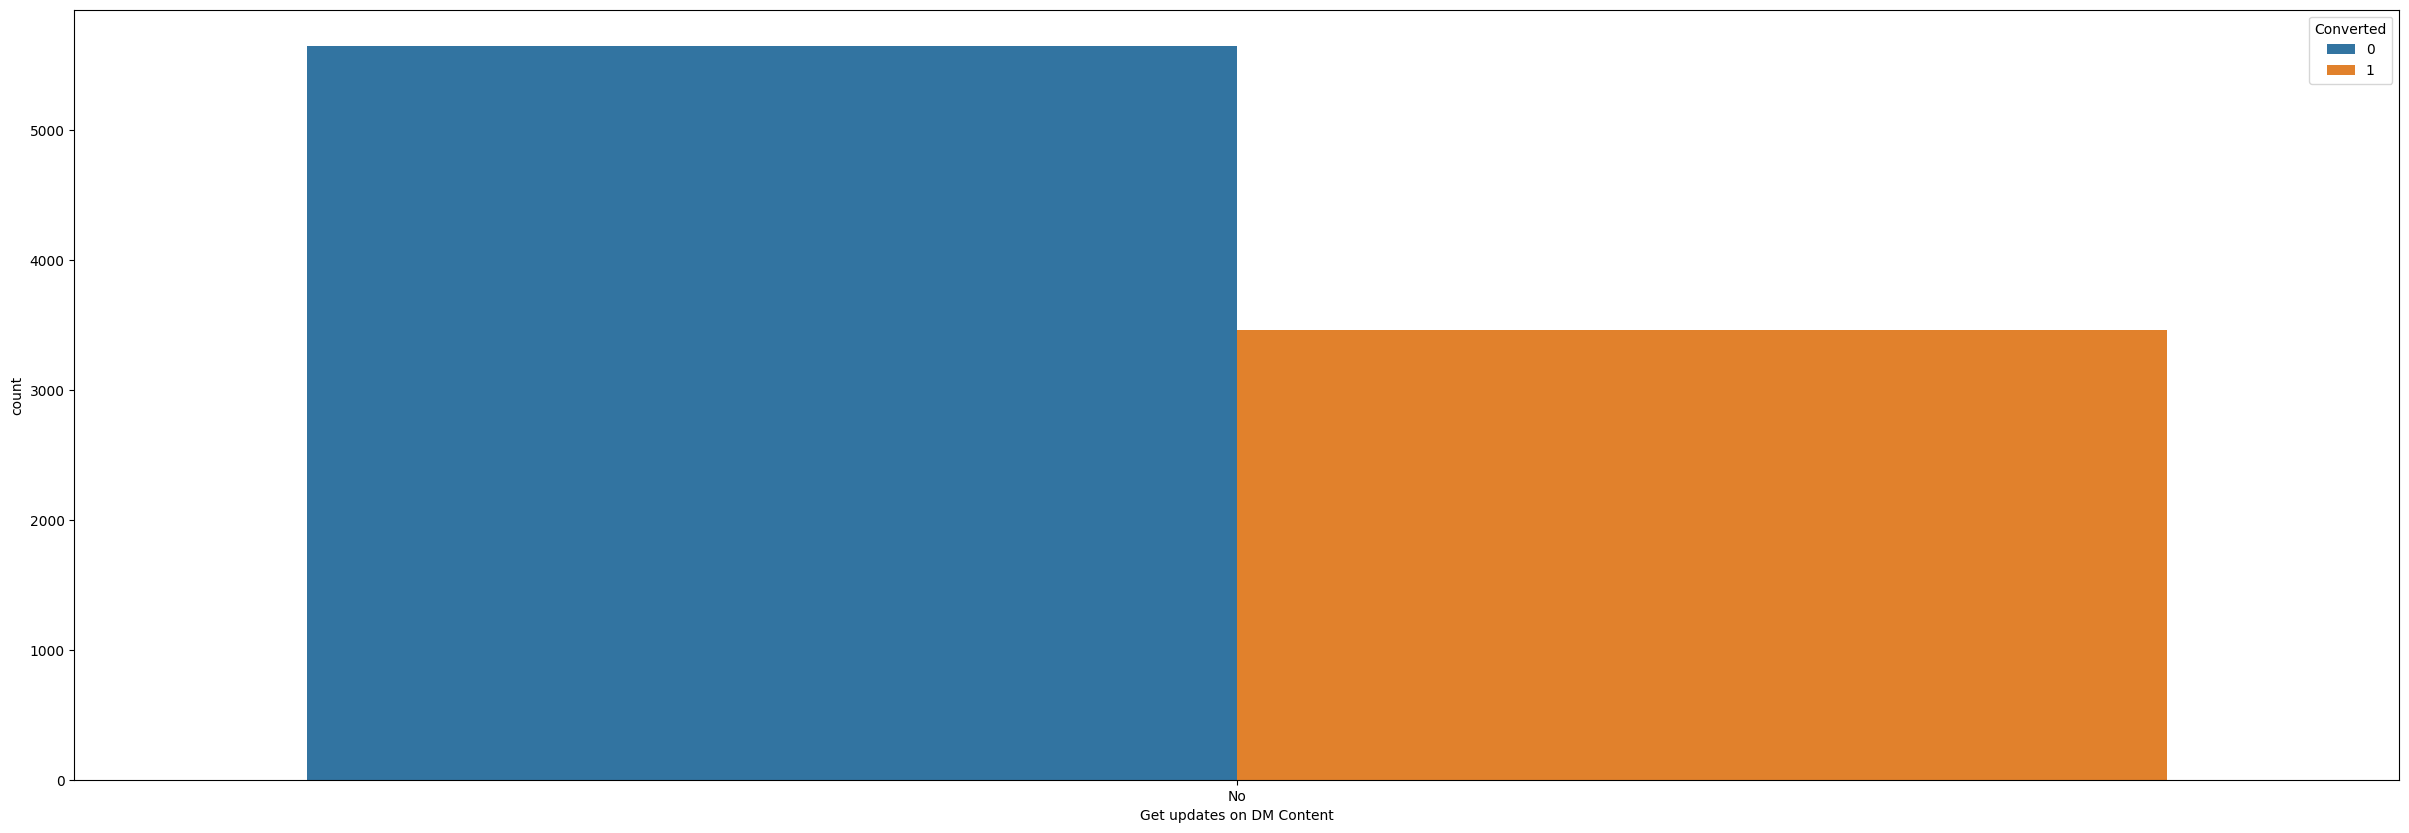

City


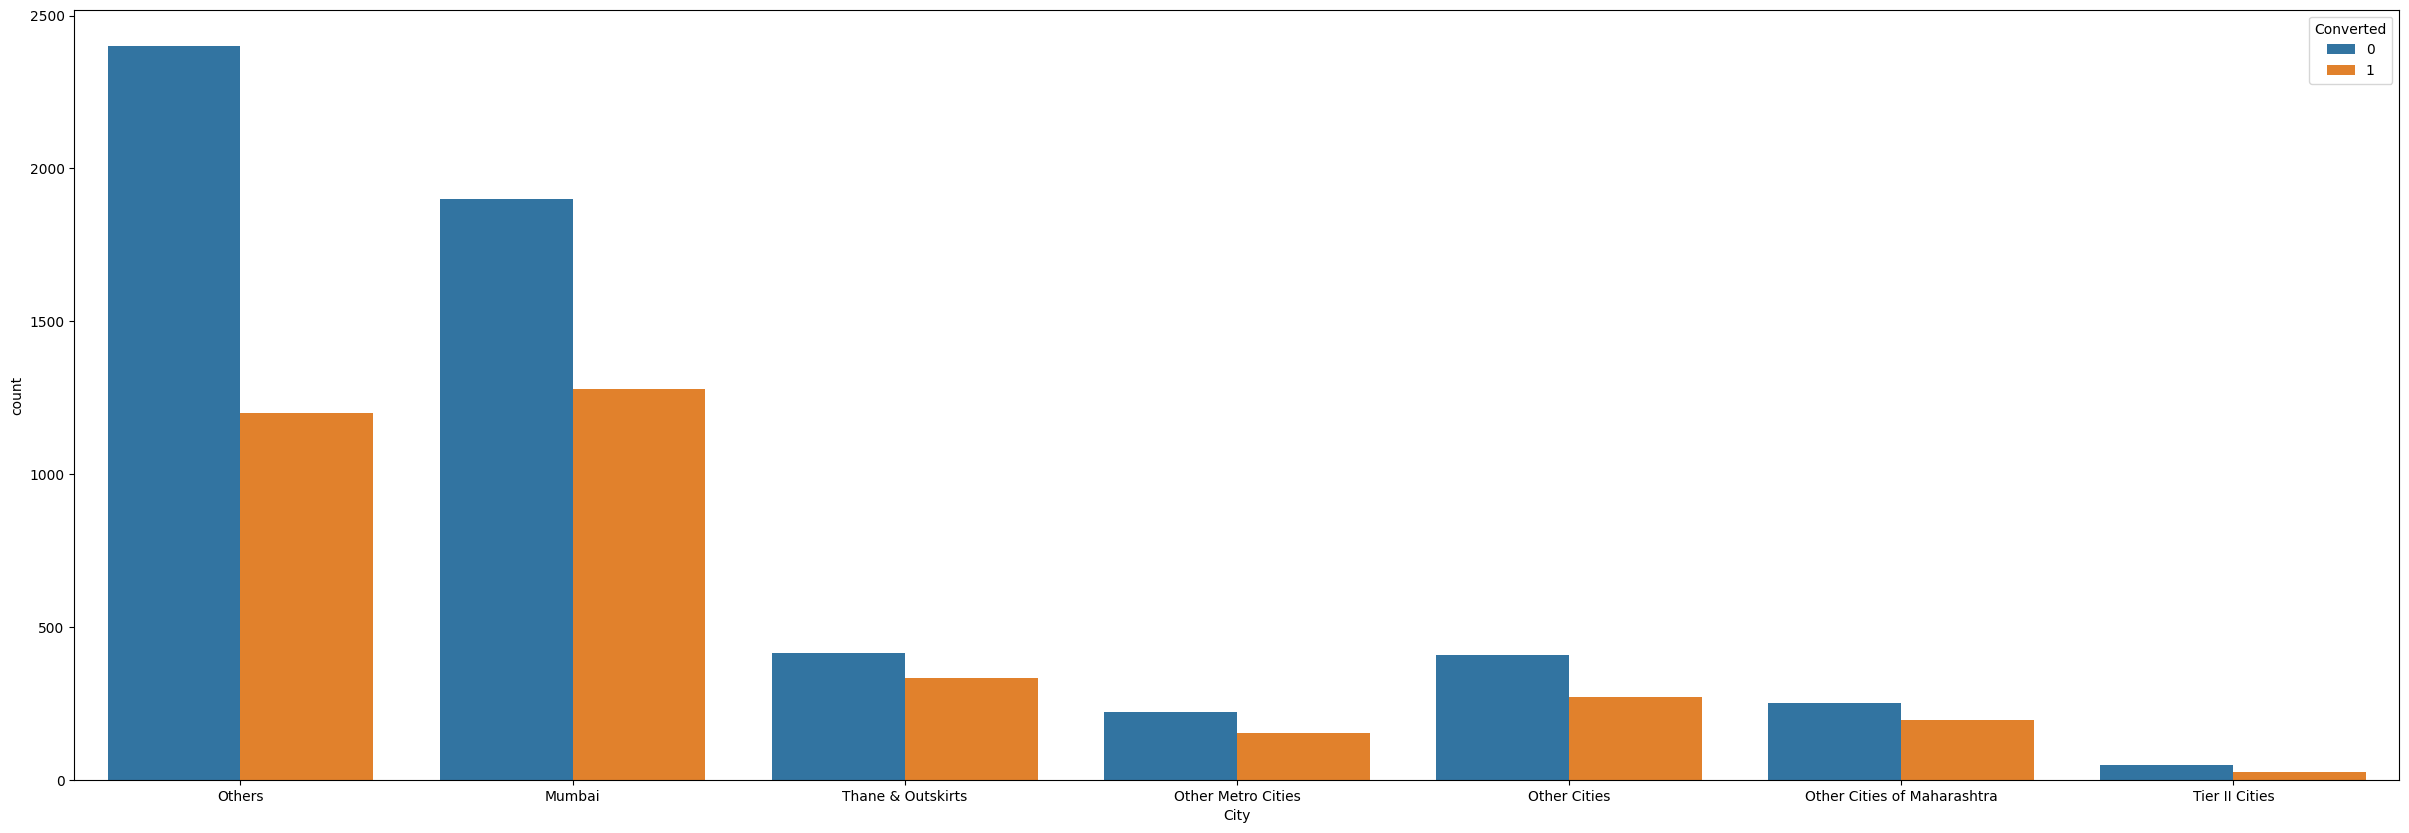

I agree to pay the amount through cheque


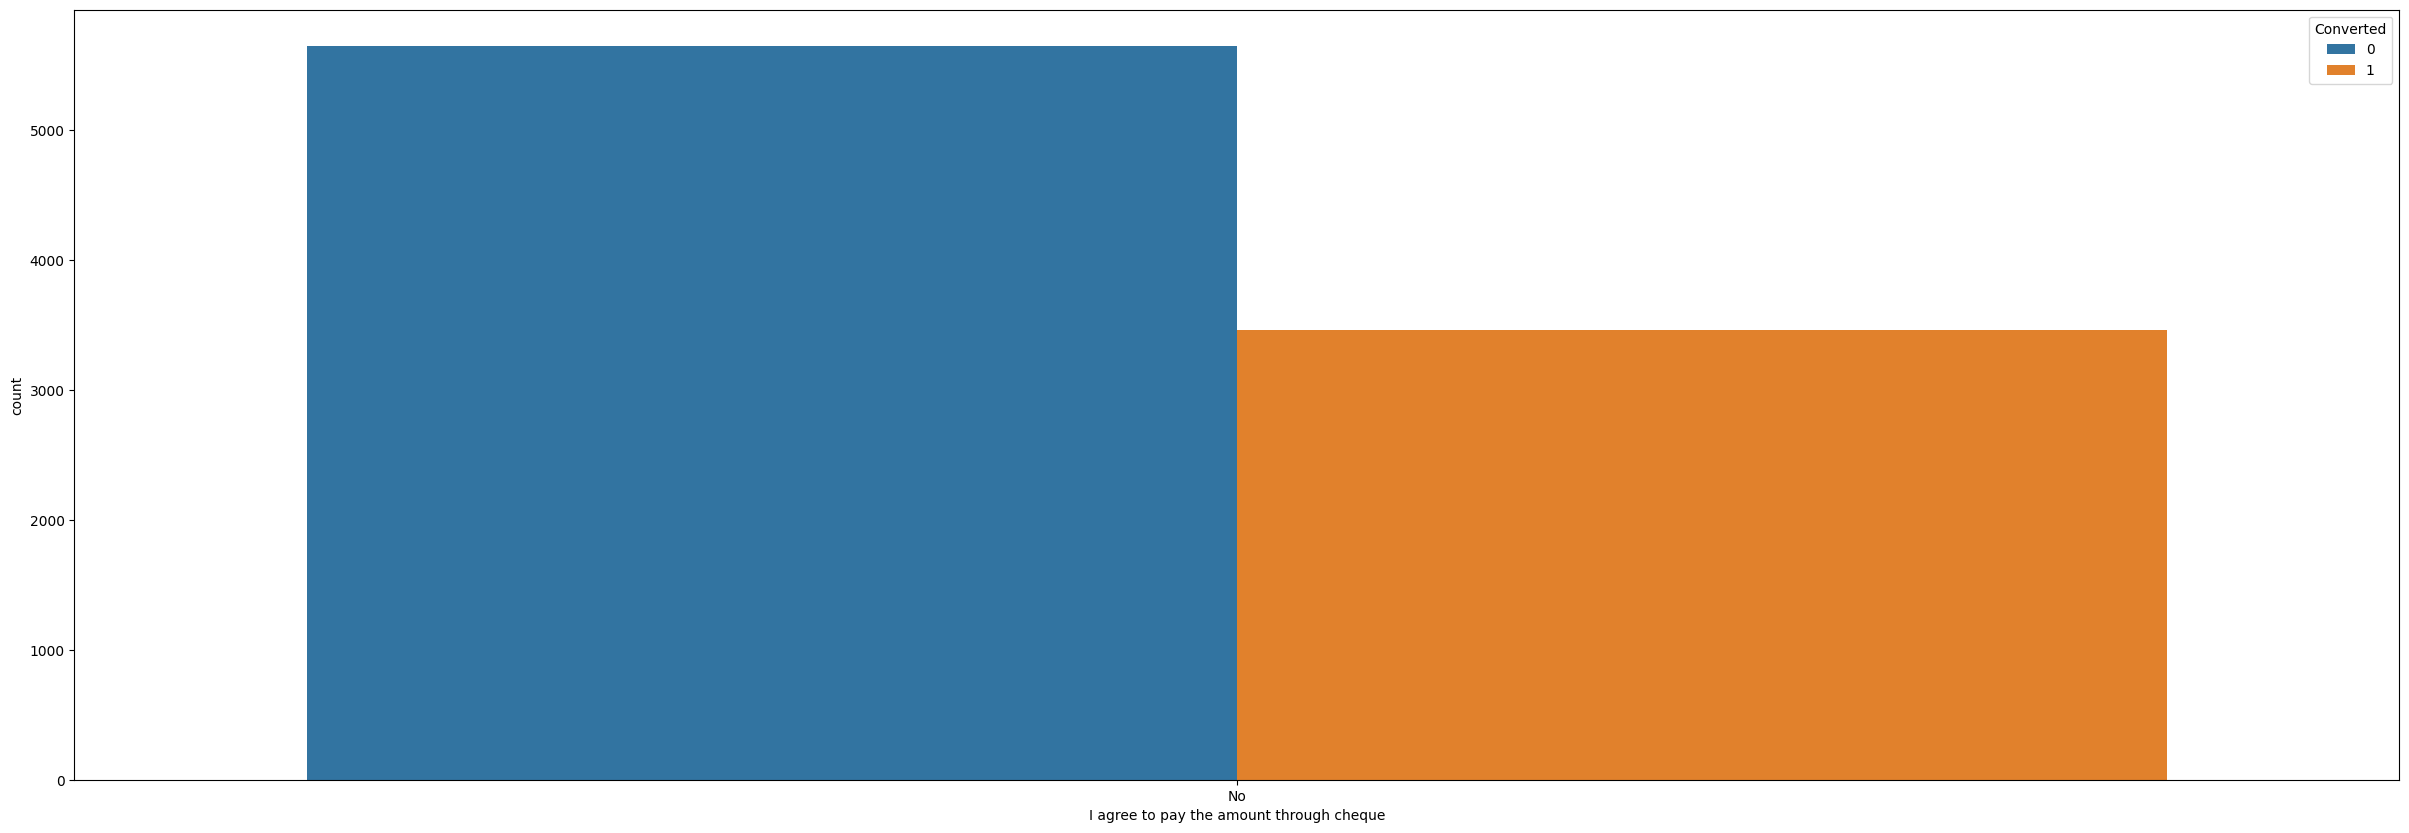

A free copy of Mastering The Interview


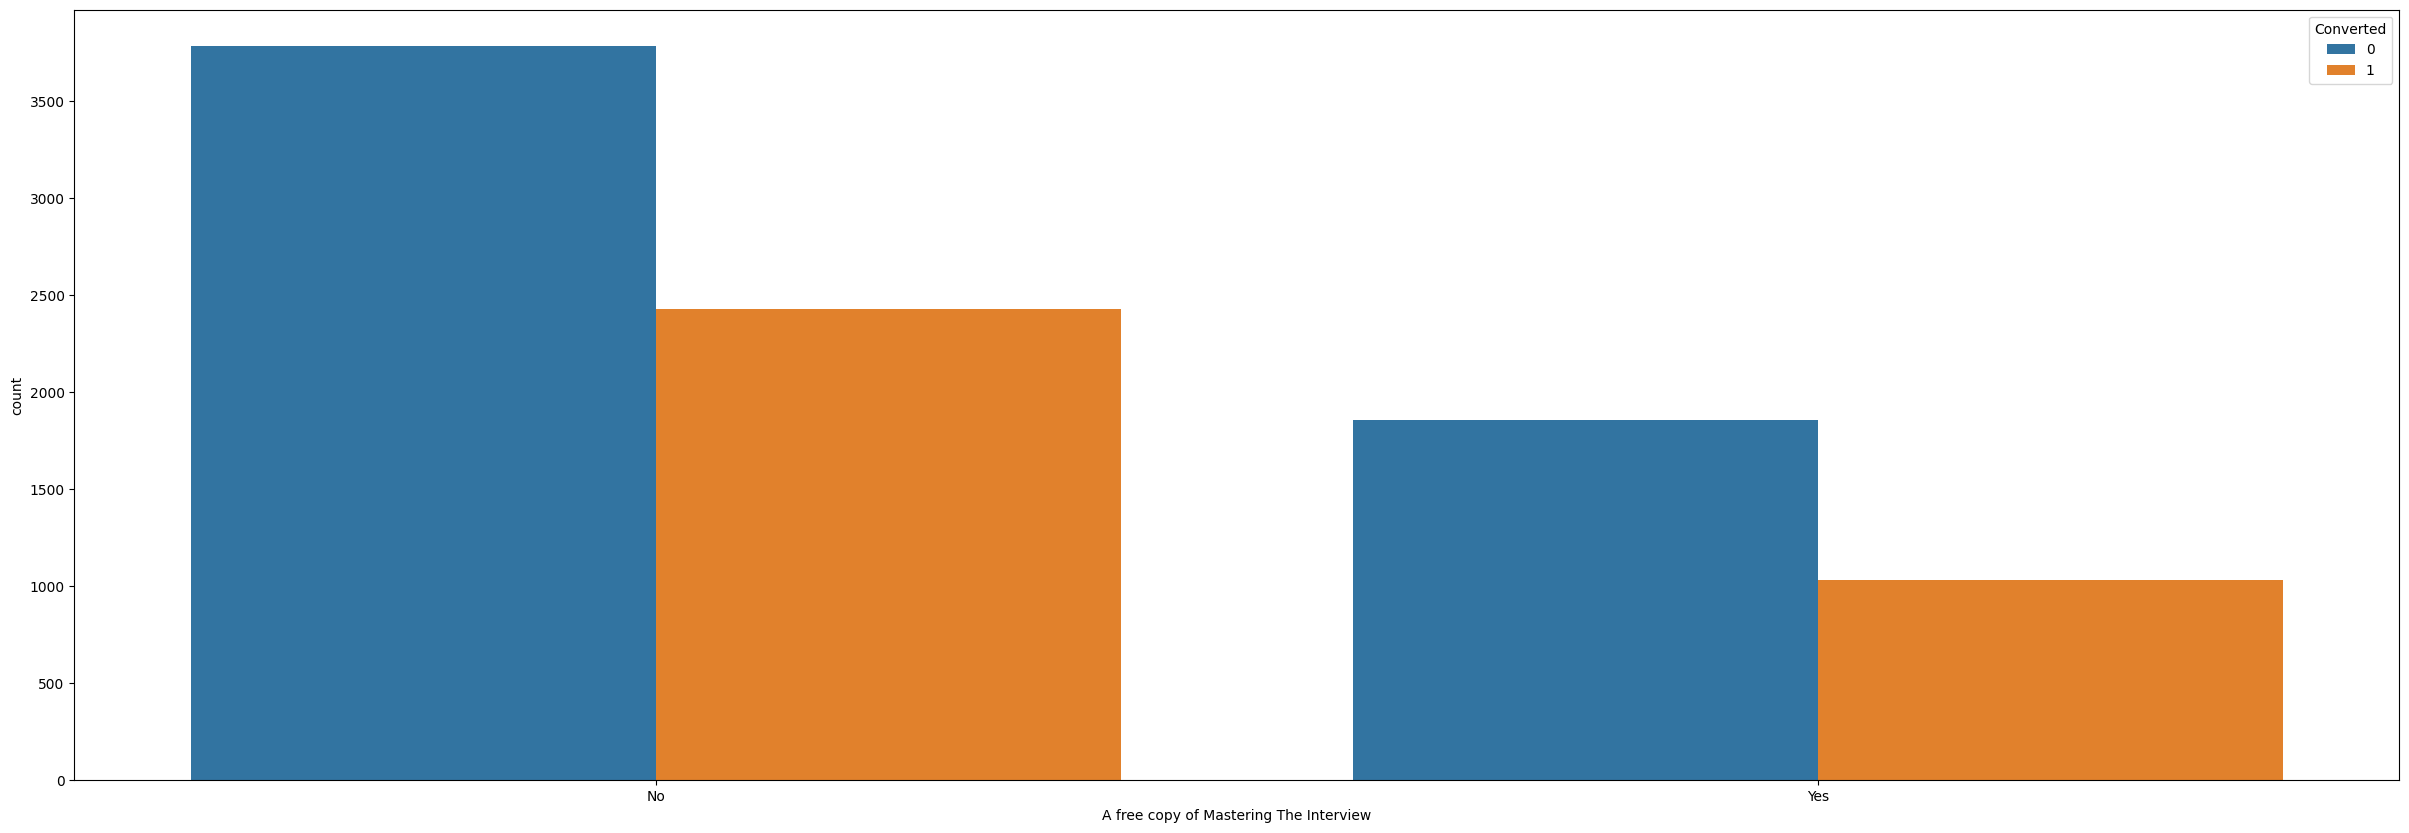

Last Notable Activity


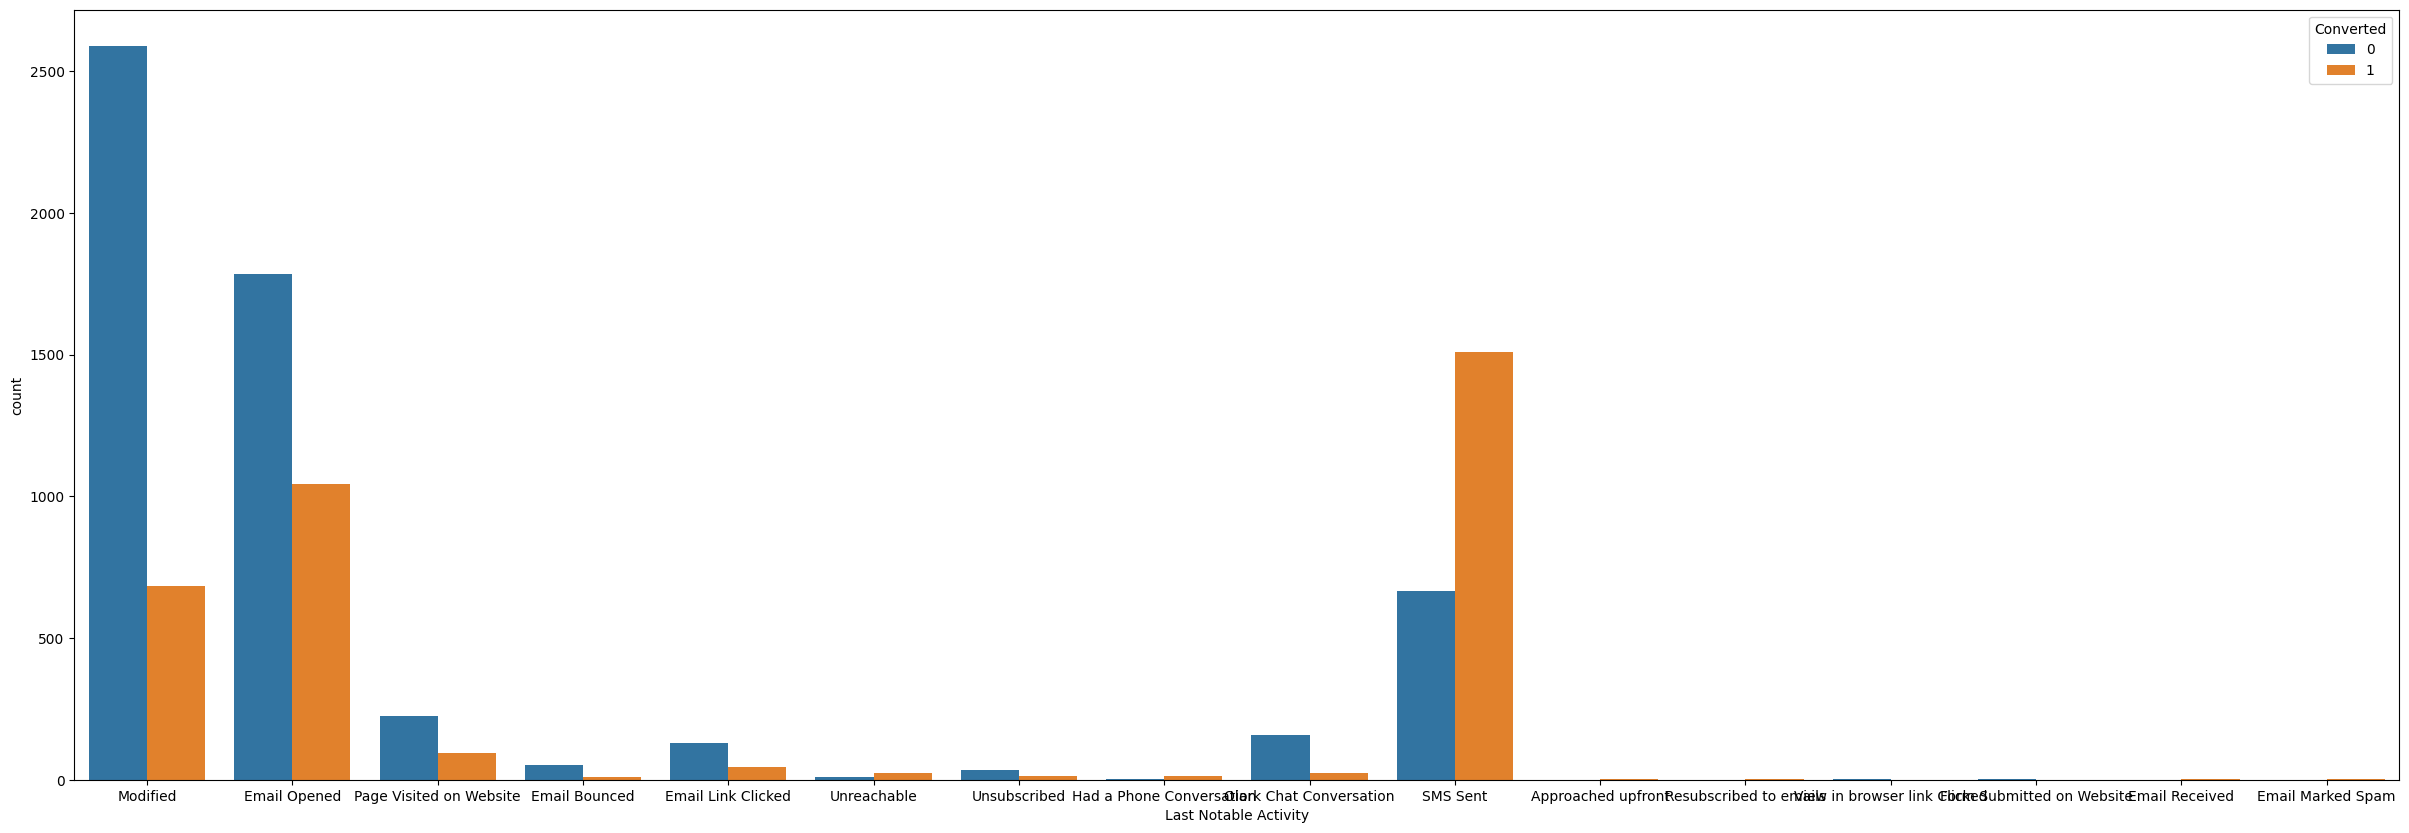

In [20]:
for i in cat_obj:
  print(i)
  plt.figure(figsize=[30,10])
  sns.countplot(x=i,hue='Converted',data=dataset)
  plt.show()

## Insights


*   Leads with Do not call and do not email are not likely to take up the course
*   Last activity with Email opened and SMS send are more likely to take up the course
* Majority of the leasd are form India
* Most people with other or unknown specialization are more likely to take up the course followed by Finance Management and resource marketing
*Working professionals are more likely to take up the coures



In [21]:
cat_num = list(dataset.select_dtypes(include=['int64','float64']))
del cat_num[0]
print(cat_num)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [ ]:
#pair plot
sns.pairplot(dataset[cat_num])
plt.show()

In [ ]:
#Corelation in Numerical columns
plt.figure(figsize=[10,10])
sns.heatmap(dataset[list(dataset.select_dtypes(include=['int64','float64']))].corr(),annot = True, cmap='BuPu')

### Insights
* Total Visits and page view per vist are positively corelated with a value of 0.51
* Total time spend on website has positive correlation with the page views per visit with a value of 0.32

Mapping the Binary columns to 0 and 1

In [ ]:
binary_cols = ['Do Not Email','Do Not Call','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Get updates on DM Content']
dataset[binary_cols] = dataset[binary_cols].apply(lambda x: x.map({'Yes':1,'No':0}))
dataset.head()

# Data Preparation


* Create dummies for categorical variables
* Perform Train test split
* Preform scaling



In [ ]:
cat_cols = list(dataset.select_dtypes(include='object'))
cat_cols

In [ ]:
# Lead Origin
a = pd.get_dummies(dataset['Lead Origin'],prefix = 'Lead Origin',drop_first = True)
dataset_final0 = pd.concat([dataset,a],axis=1)

# Lead Source
b = pd.get_dummies(dataset['Lead Source'],prefix = 'Lead Source',drop_first = True)
dataset_final1 = pd.concat([dataset_final0,b],axis=1)

# Last Activity
c = pd.get_dummies(dataset['Last Activity'],prefix = 'Last Activity',drop_first = True)
dataset_final2 = pd.concat([dataset_final1,c],axis=1)

# Country
d = pd.get_dummies(dataset['Country'],prefix = 'Country',drop_first = True)
dataset_final3 = pd.concat([dataset_final2,d],axis=1)

# Specialization
e = pd.get_dummies(dataset['Specialization'],prefix = 'Specialization',drop_first = True)
dataset_final4 = pd.concat([dataset_final3,e],axis=1)

# What is your current occupation
f = pd.get_dummies(dataset['What is your current occupation'],prefix = 'What is your current occupation',drop_first = True)
dataset_final5 = pd.concat([dataset_final4,f],axis=1)

# What matters most to you in choosing a course
g = pd.get_dummies(dataset['What matters most to you in choosing a course'],prefix = 'What matters most to you in choosing a course',drop_first = True)
dataset_final6 = pd.concat([dataset_final5,g],axis=1)

# Tags
h = pd.get_dummies(dataset['Tags'],prefix = 'Tags',drop_first = True)
dataset_final7 = pd.concat([dataset_final6,h],axis=1)

# City
i = pd.get_dummies(dataset['City'],prefix = 'City',drop_first = True)
dataset_final8 = pd.concat([dataset_final7,i],axis=1)

# Last Notable Activity
j = pd.get_dummies(dataset['Last Notable Activity'],prefix = 'Last Notable Activity',drop_first = True)
dataset_final = pd.concat([dataset_final8,j],axis=1)

dataset_final.head()

In [ ]:
dataset_final.drop(columns = cat_cols, axis = 1,inplace= True)
dataset_final.head()

In [ ]:
# Train Test split
x = dataset_final.drop('Converted',axis= 1)
y = dataset_final['Converted']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 10)

In [ ]:
# Scaling the data
scalar = StandardScaler()
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scalar.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_train.head()

In [ ]:
converted = sum(dataset['Converted'])/len(dataset['Converted'].index)
converted

# Model Building

In [ ]:
# Top 15 feature selection by using RFE
logregg = LogisticRegression()
rfe = RFE(logregg,n_features_to_select=15)
rfe.fit(x_train,y_train)

In [ ]:
rfe.support_

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
top_cols = x_train.columns[rfe.support_]
top_cols

# Model 1
 Assessing the model with statsmodels

In [ ]:
x_train_sm = sm.add_constant(x_train[top_cols])
logm1 = sm.GLM(y_train,x_train_sm,family = sm.families.Binomial())
res = logm1.fit()
res.summary()

In [ ]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted_val': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final.head()

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

In [ ]:
cm = metrics.confusion_matrix(y_train_pred_final['Converted_val'],y_train_pred_final['Predicted'])
cm

In [ ]:
acc = metrics.accuracy_score(y_train_pred_final['Converted_val'],y_train_pred_final['Predicted'])
acc

Checking VIF's

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train[top_cols].columns
vif['VIF'] = [variance_inflation_factor(x_train[top_cols].values,i) for i in range(x_train[top_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

# Model 2

In [ ]:
top_cols = top_cols.drop('Tags_Interested in Next batch',1)
top_cols

In [ ]:
x_train_sm = sm.add_constant(x_train[top_cols])
logm2 = sm.GLM(y_train,x_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
vif1 = pd.DataFrame()
vif1['Features'] = x_train[top_cols].columns
vif1['VIF'] = [variance_inflation_factor(x_train[top_cols].values,i) for i in range(x_train[top_cols].shape[1])]
vif1['VIF'] = round(vif1['VIF'],2)
vif1 = vif1.sort_values(by = 'VIF',ascending = False)
vif1

# ROC Curve

In [ ]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
TP/ float(TP+FN)

In [ ]:
TP / float(TN+FP)

In [ ]:
FP / float(TN+FP)

In [ ]:
TP / float(TP+FP)

In [ ]:
TN / float(TN+FN)

In [ ]:
def draw_roc(actual,probs):
  fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate= False)

  auc_score = metrics.roc_auc_score(actual,probs)
  plt.figure(figsize=(5,5))
  plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)' % auc_score)
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc = 'lower right')
  plt.show()
  return None

In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final["Converted_val"],y_train_pred_final['Converted_prob'],drop_intermediate = False)

In [ ]:
draw_roc(y_train_pred_final['Converted_val'],y_train_pred_final['Converted_prob'])

In [ ]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
  y_train_pred_final[i] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

In [ ]:
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
for i in nums:
  cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_val'],y_train_pred_final[i])
  total1 = sum(sum(cm1))
  acc1 = (cm1[0,0]+cm1[1,1])/total1
  sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
  speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  cutoff_df.loc[i] = [i,acc1,sensi,speci]
cutoff_df

In [ ]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final.head()

In [ ]:
cm = metrics.confusion_matrix(y_train_pred_final['Converted_val'],y_train_pred_final['Final_Predicted'])
cm

In [ ]:
acc = metrics.accuracy_score(y_train_pred_final['Converted_val'],y_train_pred_final['Final_Predicted'])
acc